In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
from scipy import stats 
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
import os
import gc
import pylab
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor,Lasso,LinearRegression,Ridge
from sklearn.svm import SVR
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!wget --header="Host: doc-00-98-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36 Edg/86.0.622.58" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_ne0kvt0qd6os8a3ml789ao3v98s9j6ko_nonce=v3cgm2u8qaqb0" --header="Connection: keep-alive" "https://doc-00-98-docs.googleusercontent.com/docs/securesc/0ett1sjns8i7cuptvjmi6sd76v2m5kng/m9bu12t1kifdbne6gnhgsmveqta4kgp6/1604887800000/08318906962772725564/08318906962772725564/1jTCi1DqrqODGW1d1n5TwdGsz4qrsu8uh?e=download&authuser=0&nonce=v3cgm2u8qaqb0&user=08318906962772725564&hash=up3cs89jjs02plu3fb8r4imqdf1isicd" -c -O 'train.csv'

--2020-11-09 02:12:42--  https://doc-00-98-docs.googleusercontent.com/docs/securesc/0ett1sjns8i7cuptvjmi6sd76v2m5kng/m9bu12t1kifdbne6gnhgsmveqta4kgp6/1604887800000/08318906962772725564/08318906962772725564/1jTCi1DqrqODGW1d1n5TwdGsz4qrsu8uh?e=download&authuser=0&nonce=v3cgm2u8qaqb0&user=08318906962772725564&hash=up3cs89jjs02plu3fb8r4imqdf1isicd
Resolving doc-00-98-docs.googleusercontent.com (doc-00-98-docs.googleusercontent.com)... 172.217.2.97, 2607:f8b0:4004:80a::2001
Connecting to doc-00-98-docs.googleusercontent.com (doc-00-98-docs.googleusercontent.com)|172.217.2.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘train.csv’

train.csv               [        <=>         ]  66.78M  31.0MB/s    in 2.2s    

2020-11-09 02:12:45 (31.0 MB/s) - ‘train.csv’ saved [70025339]



In [3]:
!wget --header="Host: doc-0g-98-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36 Edg/86.0.622.58" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_ne0kvt0qd6os8a3ml789ao3v98s9j6ko=08318906962772725564|1604887800000|mbcb4v2rfsheve8s9deej91tpqc6sln6" --header="Connection: keep-alive" "https://doc-0g-98-docs.googleusercontent.com/docs/securesc/0ett1sjns8i7cuptvjmi6sd76v2m5kng/e6ftvrsag5u7albn4vftn1u662f0ujp7/1604887950000/08318906962772725564/08318906962772725564/1qh5MVF0ekJjTRfqDDdnq0fDv0y-VZ0hT?e=download&authuser=0" -c -O 'test.csv'

--2020-11-09 02:13:39--  https://doc-0g-98-docs.googleusercontent.com/docs/securesc/0ett1sjns8i7cuptvjmi6sd76v2m5kng/e6ftvrsag5u7albn4vftn1u662f0ujp7/1604887950000/08318906962772725564/08318906962772725564/1qh5MVF0ekJjTRfqDDdnq0fDv0y-VZ0hT?e=download&authuser=0
Resolving doc-0g-98-docs.googleusercontent.com (doc-0g-98-docs.googleusercontent.com)... 172.217.2.97, 2607:f8b0:4004:80a::2001
Connecting to doc-0g-98-docs.googleusercontent.com (doc-0g-98-docs.googleusercontent.com)|172.217.2.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘test.csv’

test.csv                [   <=>              ]  43.60M   107MB/s    in 0.4s    

2020-11-09 02:13:40 (107 MB/s) - ‘test.csv’ saved [45715862]



In [4]:
data_train = pd.read_csv('/content/train.csv')
data_test = pd.read_csv('/content/test.csv')
data_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,...,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [5]:
X = data_train.drop(['loss'],axis = 1)
y = data_train['loss']

shift = 200

y_log = np.log(y+shift)   #target log transformed

**Train-Test split**

In [6]:
X_train,X_test,y_train,y_test =  train_test_split(X,y_log,test_size = 0.2,random_state = 100)

print('shape of x_train : ',X_train.shape)
print('shape of y_train : ',y_train.shape)
print('shape of x_test  : ',X_test.shape)
print('shape of y_test  : ',y_test.shape)

shape of x_train :  (150654, 131)
shape of y_train :  (150654,)
shape of x_test  :  (37664, 131)
shape of y_test  :  (37664,)


In [7]:
print('Null value in train data: ',X_train.isnull().sum().sum())
print('Null value in test data: ',X_test.isnull().sum().sum())

Null value in train data:  0
Null value in test data:  0


In [8]:
categorical_features_train = list(X_train.select_dtypes(include=['object']).columns)
print("Categorical features in Train data : {} features".format(len(categorical_features_train)))
continous_features_train = list(X_train.select_dtypes(include=['float']).columns)
print("Continous features in Train data : {} features".format(len(continous_features_train)))

Categorical features in Train data : 116 features
Continous features in Train data : 14 features


In [9]:
categorical_features_test = list(X_test.select_dtypes(include=['object']).columns)
print("Categorical features in Test data : {} features".format(len(categorical_features_test)))
continous_features_test = list(X_test.select_dtypes(include=['float']).columns)
print("Continous features in Test data : {} features".format(len(continous_features_test)))

Categorical features in Test data : 116 features
Continous features in Test data : 14 features


In [10]:
'''
Here we creating Dictionary for catehories and there frequency of levels in each categorical features
'''
feature_count_train_dict = {i : dict(X_train.groupby(i)['id'].count()) for i in categorical_features_train}

### **Features in test and train have different levels**

In [11]:
mismatch_cat_features=[]
for col in categorical_features_train:
  if (set(feature_count_train_dict[col].keys()) - set(X_test[col].unique())) or (set(X_test[col].unique()) - set(feature_count_train_dict[col].keys())):
    mismatch_cat_features.append(col)
print('Features that have mismatch of levels in train and test set are :',mismatch_cat_features)
print('Number of categorical features that has mismatch in levels are: ',len(mismatch_cat_features))

Features that have mismatch of levels in train and test set are : ['cat75', 'cat89', 'cat90', 'cat92', 'cat96', 'cat99', 'cat101', 'cat102', 'cat103', 'cat104', 'cat105', 'cat106', 'cat109', 'cat110', 'cat111', 'cat113', 'cat114', 'cat115', 'cat116']
Number of categorical features that has mismatch in levels are:  19


In [12]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

### **Different levels are replaced by 'NaN' in test data**

In [13]:
'''
Handling mismatch level in features .

Simple way is to put 'NaN' if we found unknown level in test set.

Like 'cat101' has levels ---> A,B,C in train set and has levels ---> A,B,D.Now level D is present in test set but not in train set so level D is unknown.So we replace level D in with NaN.

So finally in test set 'cat101' has levels ---> A,B,NaN.

So we have to handle these NaN values in test set while Encoding categorical features.
'''

def search_feature(x,combine_set):
  #print(combine_set)
  if x in combine_set:
      return np.nan
  return x


for col in categorical_features_test:
  if (set(feature_count_train_dict[col].keys()) - set(X_test_copy[col].unique())) or (set(X_test_copy[col].unique()) - set(feature_count_train_dict[col].keys())) :
    #print('yes')
    unique_train = set(feature_count_train_dict[col].keys())
    unique_test = set(X_test_copy[col].unique())
    rem_train = unique_train-unique_test
    rem_test = unique_test-unique_train
    #print('rem_train',rem_train)
    #print('rem_test',rem_test)
    combine_set = rem_train.union(rem_test)
    #print('combine_set',combine_set)
    mapp_nan = {i: np.nan for i in combine_set }
    #print( mapp_nan)
    #uniq_nan_testdf['cat92'] = uniq_nan_testdf['cat92'].map(mapp_nan)

    X_test_copy[col] = X_test_copy[col].apply(lambda x: search_feature(x,combine_set),1)

In [14]:
#Is any null or nan in test data?

print('Number of NaN values in test set are : ', X_test_copy.isnull().sum().sum())


Number of NaN values in test set are :  24


## **Frequency label Encoding**

Here we will do frequency based label encoding as we do for low level features.

Here we will generate unique labels on levels for categorical features.

E.g. let 'cat1' feature has 4 levels with frequency are A>C>B>D. that is A has occured more time so will 
      assigned highest label to A level. After encoding we get  D:0,B:1,C:2,A:4. This way we will assigned labels.

      Since we have NaN in test set so we have handle that as well.We will assigned -1 label to nan. 

In [15]:
label_encoded_map_dict = {}
for col in categorical_features_train:
  z = {k: i for i, k in enumerate(X_train.groupby([col])['id'].count().sort_values().index)}
  z[np.nan] = -1
  label_encoded_map_dict[col]=z

In [16]:
label_encoded_map_dict['cat80']

{'A': 0, 'B': 2, 'C': 1, 'D': 3, nan: -1}

In [17]:
X_train_label_encoded = X_train.copy()
for col in categorical_features_train:
  X_train_label_encoded[col] = X_train[col].map(label_encoded_map_dict[col])
X_train_label_encoded.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
180302,562558,1,0,0,1,1,1,1,1,0,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,7,5,3,5,4,7,5,4,12,12,15,8,12,9,18,10,18,5,80,124,15,29,57,18,17,279,0.289618,0.358319,0.506105,0.354893,0.302678,0.182014,0.308785,0.29758,0.32128,0.21230,0.180456,0.178698,0.261150,0.827278
105000,327963,1,0,1,0,1,1,1,1,0,1,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,7,5,4,6,3,7,6,4,15,10,10,8,12,16,18,15,18,10,82,85,14,45,36,18,22,309,0.500412,0.681761,0.592681,0.738221,0.413817,0.399144,0.360918,0.60087,0.43524,0.45567,0.348867,0.345316,0.369740,0.283699
179008,558531,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,6,4,4,6,3,7,6,4,15,14,18,8,12,16,18,13,19,10,83,124,14,40,57,18,22,309,0.480125,0.299102,0.484196,0.373816,0.422268,0.301647,0.360121,0.26847,0.41471,0.43919,0.307628,0.301921,0.315758,0.364535
121362,379025,1,0,1,1,0,1,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,...,7,5,3,4,2,7,4,1,13,12,10,8,11,13,17,16,14,6,83,88,15,47,58,18,21,306,0.548107,0.299102,0.613660,0.383428,0.732367,0.563226,0.454015,0.61229,0.54609,0.54433,0.492200,0.519456,0.642600,0.390600
82311,257441,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,3,7,6,4,15,13,16,8,12,16,18,13,19,10,80,124,14,46,57,18,22,249,0.470002,0.159990,0.419161,0.336414,0.643315,0.287716,0.357736,0.26847,0.39447,0.37493,0.260140,0.264760,0.310026,0.212656


In [18]:
print('Number of NaN after encoding train set are :',X_train_label_encoded.isnull().sum().sum())


Number of NaN after encoding train set are : 0


**Encoding Test data**

In [19]:
X_test_label_encoded = X_test_copy.copy()

for col in categorical_features_test:
  X_test_label_encoded [col] = X_test_copy[col].map(label_encoded_map_dict[col])
X_test_label_encoded .head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
76445,239095,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,...,7,5,4,3,3,7,2,4,15,7,18,8,12,14,15,10,18,10,80,121,14,35,29,16,20,2,0.238993,0.036553,0.129646,0.796346,0.281143,0.176477,0.170425,0.51853,0.24180,0.21230,0.126256,0.125933,0.204240,0.838263
137451,428873,1,0,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,...,6,4,4,6,3,7,5,4,15,14,16,8,12,14,18,13,18,10,83,123,14,19,44,18,17,305,0.356663,0.737068,0.634224,0.373816,0.491114,0.272540,0.295775,0.50060,0.33611,0.31480,0.257148,0.264760,0.339244,0.322202
168987,527062,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,6,4,4,6,3,7,6,4,15,14,16,8,12,16,18,16,19,10,83,127,15,49,53,18,22,309,0.513457,0.737068,0.549770,0.594598,0.811271,0.416181,0.408773,0.62918,0.50630,0.37493,0.338312,0.331643,0.315758,0.254741
55044,172381,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,5,4,3,6,2,7,3,1,13,11,18,8,12,15,17,14,14,6,83,124,15,46,57,18,19,310,0.642763,0.422197,0.613660,0.327354,0.422268,0.688705,0.480915,0.33906,0.62542,0.73106,0.661688,0.648446,0.687115,0.211274
72647,227026,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,5,4,4,5,3,7,4,4,15,13,18,8,12,15,16,14,19,10,83,123,15,50,34,13,20,310,0.585115,0.555782,0.571360,0.554673,0.594196,0.502705,0.480792,0.43518,0.66201,0.58257,0.644013,0.630853,0.354344,0.824170


In [20]:

print('Number of NaN in encoded test data are : ',X_test_label_encoded.isnull().sum().sum())


Number of NaN in encoded test data are :  0


preparing train-test set for modeling.

In [21]:
X_train1 = X_train_label_encoded.copy()

X_train1 = X_train1.drop(['id'],axis = 1)

X_test1 = X_test_label_encoded.copy()
X_test1= X_test1.drop(['id'],axis=1)
X_test1.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
76445,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,...,7,5,4,3,3,7,2,4,15,7,18,8,12,14,15,10,18,10,80,121,14,35,29,16,20,2,0.238993,0.036553,0.129646,0.796346,0.281143,0.176477,0.170425,0.51853,0.24180,0.21230,0.126256,0.125933,0.204240,0.838263
137451,1,0,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,...,6,4,4,6,3,7,5,4,15,14,16,8,12,14,18,13,18,10,83,123,14,19,44,18,17,305,0.356663,0.737068,0.634224,0.373816,0.491114,0.272540,0.295775,0.50060,0.33611,0.31480,0.257148,0.264760,0.339244,0.322202
168987,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,6,4,4,6,3,7,6,4,15,14,16,8,12,16,18,16,19,10,83,127,15,49,53,18,22,309,0.513457,0.737068,0.549770,0.594598,0.811271,0.416181,0.408773,0.62918,0.50630,0.37493,0.338312,0.331643,0.315758,0.254741
55044,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,5,4,3,6,2,7,3,1,13,11,18,8,12,15,17,14,14,6,83,124,15,46,57,18,19,310,0.642763,0.422197,0.613660,0.327354,0.422268,0.688705,0.480915,0.33906,0.62542,0.73106,0.661688,0.648446,0.687115,0.211274
72647,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,5,4,4,5,3,7,4,4,15,13,18,8,12,15,16,14,19,10,83,123,15,50,34,13,20,310,0.585115,0.555782,0.571360,0.554673,0.594196,0.502705,0.480792,0.43518,0.66201,0.58257,0.644013,0.630853,0.354344,0.824170


### Preprocessing test data given in test.csv file.This data we have to use for submission in kaggle to get LB score

In [22]:
mismatch_cat_features=[]
for col in categorical_features_train:
  if (set(feature_count_train_dict[col].keys()) - set(data_test[col].unique())) or (set(X_test[col].unique()) - set(feature_count_train_dict[col].keys())):
    mismatch_cat_features.append(col)
print('Features that have mismatch of levels in train and test set are :',mismatch_cat_features)
print('Number of categorical features that has mismatch in levels are: ',len(mismatch_cat_features))

Features that have mismatch of levels in train and test set are : ['cat75', 'cat89', 'cat90', 'cat92', 'cat101', 'cat102', 'cat105', 'cat109', 'cat110', 'cat111', 'cat113', 'cat114', 'cat116']
Number of categorical features that has mismatch in levels are:  13


In [23]:
def search_feature(x,combine_set):
  #print(combine_set)
  if x in combine_set:
      return np.nan
  return x

X_test =  data_test.copy()
for col in categorical_features_test:
  if (set(feature_count_train_dict[col].keys()) - set(X_test[col].unique())) or (set(X_test[col].unique()) - set(feature_count_train_dict[col].keys())) :
    #print('yes')
    unique_train = set(feature_count_train_dict[col].keys())
    unique_test = set(X_test[col].unique())
    rem_train = unique_train-unique_test
    rem_test = unique_test-unique_train
    #print('rem_train',rem_train)
    #print('rem_test',rem_test)
    combine_set = rem_train.union(rem_test)
    #print('combine_set',combine_set)
    mapp_nan = {i: np.nan for i in combine_set }
    #print( mapp_nan)
    #uniq_nan_testdf['cat92'] = uniq_nan_testdf['cat92'].map(mapp_nan)

    X_test[col] = X_test[col].apply(lambda x: search_feature(x,combine_set),1)

In [24]:
#Is any null or nan in test data?

print('Number of NaN values in test set are : ', X_test.isnull().sum().sum())

Number of NaN values in test set are :  64


In [25]:
label_encoded_map_dict = {}
for col in categorical_features_train:
  z = {k: i for i, k in enumerate(X_train.groupby([col])['id'].count().sort_values().index)}
  z[np.nan] = -1
  label_encoded_map_dict[col]=z
  
X_test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,A,D,C,C,E,C,D,T,H,G,A,A,G,E,I,L,K,BI,BC,A,J,AX,A,Q,HG,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,A,D,D,D,E,A,A,P,B,D,A,A,G,G,G,F,B,BI,CO,E,G,X,A,L,HK,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,B,A,B,B,B,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,...,A,A,D,D,C,E,E,A,D,G,Q,A,D,D,E,J,G,A,BI,CS,C,U,AE,A,K,CK,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,...,G,H,D,D,C,E,E,D,T,G,A,A,D,E,E,I,K,K,BI,CR,A,AY,AJ,A,P,DJ,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,...,A,A,D,B,D,E,A,A,P,A,A,A,A,F,E,G,E,B,AB,EG,A,E,I,C,J,HA,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [37]:
label_encoded_map_dict['cat89']

{'A': 7, 'B': 6, 'C': 5, 'D': 4, 'E': 3, 'G': 0, 'H': 1, 'I': 2, nan: -1}

In [26]:
X_test_lb_encoded = X_test.copy()

for col in categorical_features_test:
  X_test_lb_encoded [col] = X_test[col].map(label_encoded_map_dict[col])
X_test_lb_encoded.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,...,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,7,5,4,4,4,7,6,3,14,8,15,8,12,15,18,13,12,9,83,120,15,47,55,18,15,302,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,7,5,4,6,3,7,4,4,15,5,17,8,12,15,16,16,19,10,83,123,13,36,52,18,17,310,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,...,7,5,4,6,4,7,5,4,12,10,9,8,9,14,18,12,18,5,83,126,14,43,57,18,22,308,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,...,5,4,4,6,4,7,5,3,14,10,18,8,9,16,18,13,15,9,83,102,15,27,45,18,18,309,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,3,7,4,4,15,7,18,8,12,13,18,16,13,10,82,125,15,50,41,17,20,275,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [27]:
print('Number of NaN in encoded test data are : ',X_test_lb_encoded.isnull().sum().sum())

Number of NaN in encoded test data are :  0


In [28]:
X_test_lb_encoded = X_test_lb_encoded.drop(['id'],axis = 1)
X_test_lb_encoded.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,...,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,1,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,7,5,4,4,4,7,6,3,14,8,15,8,12,15,18,13,12,9,83,120,15,47,55,18,15,302,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,1,0,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,7,5,4,6,3,7,4,4,15,5,17,8,12,15,16,16,19,10,83,123,13,36,52,18,17,310,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0,1,...,7,5,4,6,4,7,5,4,12,10,9,8,9,14,18,12,18,5,83,126,14,43,57,18,22,308,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,...,5,4,4,6,4,7,5,3,14,10,18,8,9,16,18,13,15,9,83,102,15,27,45,18,18,309,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...,7,5,4,5,3,7,4,4,15,7,18,8,12,13,18,16,13,10,82,125,15,50,41,17,20,275,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


# **Modeling**

### **1. Baseline model**

In [28]:
#Base line model : y_test_predict = mean(y_train)

y_mean_train = y_train.mean()

y_train1 = np.exp(y_train)-shift
y_mean_train1 = np.exp(y_mean_train)-shift

y_test1 = np.exp(y_test)-shift


MSE_train = np.mean(np.square(y_train1 - y_mean_train1 ))
RMSE_train = np.sqrt(MSE_train)
MAE_train = np.mean(np.abs(y_train1 - y_mean_train1))

MSE_test = np.mean(np.square(y_test1 - y_mean_train1))
RMSE_test = np.sqrt(MSE_test)
MAE_test= np.mean(np.abs(y_test1 - y_mean_train1))




print('Train MSE = ',MSE_train)
print('Train RMSE = ',RMSE_train)
print('Train MAE = ',MAE_train)
print('********************************************************************')
print('Test MSE = ',MSE_test)
print('Test RMSE = ',RMSE_test)
print('Test MAE = ',MAE_test)

Train MSE =  9041752.142768214
Train RMSE =  3006.9506385652912
Train MAE =  1812.6581908331627
********************************************************************
Test MSE =  9152241.393352121
Test RMSE =  3025.267160657406
Test MAE =  1811.8684417221386


## **A. Lasso Regression**

### **i. Without Hyper-parameter Tunning**

In [33]:
model1 = Lasso()

model1.fit(X_train1,y_train)

y_train_pred = model1.predict(X_train1)
y_test_pred = model1.predict(X_test1)


y_train_pred1 = np.exp(y_train_pred)- shift
y_test_pred1 = np.exp(y_test_pred) - shift

y_train1 = np.exp(y_train)- shift
y_test1 = np.exp(y_test) - shift

train_score =  mean_absolute_error(y_train_pred1,y_train1)
test_score = mean_absolute_error(y_test_pred1,y_test1)

print('train MAE = ',train_score)
print('test MAE = ',test_score)

train MAE =  1812.6581908332028
test MAE =  1811.8684417221468


### **ii. With Hyper-parameter Tunning**

In [ ]:
model1 = Lasso()


#scoring = {'MAE': make_scorer(mean_absolute_error), 'RMSE': 'neg_root_mean_squared_error'}
#define your own mse and set greater_is_better=False
mse = make_scorer(mean_absolute_error,greater_is_better=False)
param_grid = {

    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

}


grid_search = GridSearchCV(estimator = model1 , param_grid = param_grid, cv = 5,scoring='neg_mean_absolute_error',return_train_score=True,verbose = 1,refit =True,n_jobs =-1 )
grid_search.fit(X_train1,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  2.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

best parameter :  {'alpha': 0.0001}


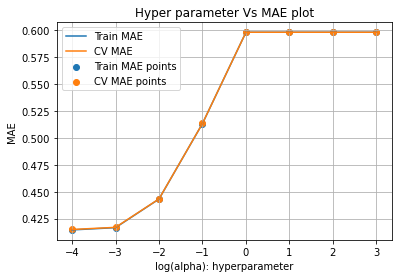

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,41.778064,20.679933,0.024326,0.000932,0.0001,{'alpha': 0.0001},-0.412412,-0.414087,-0.416707,-0.415632,-0.416009,-0.414970,0.001540,1,-0.415191,-0.414832,-0.414122,-0.414427,-0.414213,-0.414557,0.000401
1,5.269389,0.258282,0.024246,0.000561,0.001,{'alpha': 0.001},-0.414521,-0.416097,-0.418615,-0.417567,-0.417842,-0.416928,0.001454,2,-0.417313,-0.416896,-0.416266,-0.416522,-0.416332,-0.416666,0.000391
2,1.809956,0.242509,0.023486,0.001775,0.01,{'alpha': 0.01},-0.440833,-0.443882,-0.444413,-0.442886,-0.444427,-0.443288,0.001349,3,-0.443746,-0.443183,-0.442888,-0.443152,-0.442748,-0.443144,0.000342
3,0.548744,0.012839,0.022142,0.001601,0.1,{'alpha': 0.1},-0.511300,-0.515337,-0.513926,-0.511194,-0.514215,-0.513194,0.001659,4,-0.514081,-0.513222,-0.512791,-0.512861,-0.512811,-0.513153,0.000490
4,0.340045,0.006916,0.022667,0.001476,1,{'alpha': 1},-0.596314,-0.598563,-0.599174,-0.595949,-0.598699,-0.597740,0.001334,5,-0.597965,-0.597582,-0.597267,-0.598304,-0.597561,-0.597736,0.000361
5,0.348745,0.011617,0.021223,0.002816,10,{'alpha': 10},-0.596314,-0.598563,-0.599174,-0.595949,-0.598699,-0.597740,0.001334,5,-0.597965,-0.597582,-0.597267,-0.598304,-0.597561,-0.597736,0.000361
6,0.348113,0.007661,0.020459,0.001092,100,{'alpha': 100},-0.596314,-0.598563,-0.599174,-0.595949,-0.598699,-0.597740,0.001334,5,-0.597965,-0.597582,-0.597267,-0.598304,-0.597561,-0.597736,0.000361
7,0.339763,0.023795,0.019199,0.003181,1000,{'alpha': 1000},-0.596314,-0.598563,-0.599174,-0.595949,-0.598699,-0.597740,0.001334,5,-0.597965,-0.597582,-0.597267,-0.598304,-0.597561,-0.597736,0.000361


In [ ]:
print('best parameter : ',grid_search.best_params_)

results = pd.DataFrame.from_dict(grid_search.cv_results_)

results = results.sort_values(['param_alpha'])


train_MAE= np.abs(results['mean_train_score'])
train_MAE_std= results['std_score_time']
cv_MAE = np.abs(results['mean_test_score'] )
cv_MAE_std= results['std_test_score']
alpha =  results['param_alpha']
alpha = (np.log10(list(alpha)))

plt.plot((alpha),train_MAE, label='Train MAE')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_MAE, label='CV MAE')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter((alpha), train_MAE, label='Train MAE points')
plt.scatter((alpha), cv_MAE, label='CV MAE points')


plt.legend()
plt.xlabel("log(alpha): hyperparameter")
plt.ylabel("MAE")
plt.title("Hyper parameter Vs MAE plot")
plt.grid()
plt.show()

results

In [34]:
model1 = Lasso(alpha = 0.0001)

model1.fit(X_train1,y_train)

y_train_pred = model1.predict(X_train1)
y_test_pred = model1.predict(X_test1)


y_train_pred1 = np.exp(y_train_pred)- shift
y_test_pred1 = np.exp(y_test_pred) - shift

y_train1 = np.exp(y_train)- shift
y_test1 = np.exp(y_test) - shift

train_score =  mean_absolute_error(y_train_pred1,y_train1)
test_score = mean_absolute_error(y_test_pred1,y_test1)

print('train MAE = ',train_score)
print('test MAE = ',test_score)

train MAE =  1310.1845328397824
test MAE =  1310.60866675168


### **LB Score**

In [35]:
prediction_test = model1.predict(X_test_lb_encoded)
prediction_test = np.exp(prediction_test)-200

print(prediction_test)

sub = pd.read_csv('/content/sample_submission.csv')
print(sub.shape)

sub['loss'] = prediction_test

sub.to_csv('submissions_lasso_regression.csv', index=False)

[ 1410.58675447  1828.66015157 12777.85916695 ...  2268.00259359
  1083.96991795  2508.54226965]
(125546, 2)


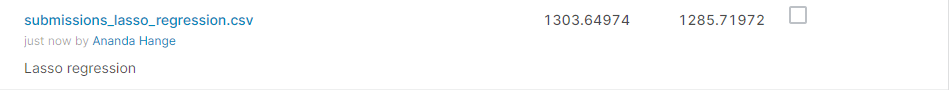

## **B. Ridge Regression**

### **i. Without Hyper-parameter Tunning**

In [36]:
model2 = Ridge()

model2.fit(X_train1,y_train)

y_train_pred = model2.predict(X_train1)
y_test_pred = model2.predict(X_test1)


y_train_pred1 = np.exp(y_train_pred)- shift
y_test_pred1 = np.exp(y_test_pred) - shift

y_train1 = np.exp(y_train)- shift
y_test1 = np.exp(y_test) - shift

train_score =  mean_absolute_error(y_train_pred1,y_train1)
test_score = mean_absolute_error(y_test_pred1,y_test1)

print('train MAE = ',train_score)
print('test MAE = ',test_score)

train MAE =  1308.5171638623776
test MAE =  1310.8104495468667


### **ii. With Hyper-parameter Tunning**

In [38]:
model2 = Ridge()


#scoring = {'MAE': make_scorer(mean_absolute_error), 'RMSE': 'neg_root_mean_squared_error'}
#define your own mse and set greater_is_better=False
mse = make_scorer(mean_absolute_error,greater_is_better=False)
param_grid = {

    'alpha': [0.0001, 0.001, 0.01, 0.1, 0,1, 10, 100, 1000]

}


grid_search = GridSearchCV(estimator = model2 , param_grid = param_grid, cv = 5,scoring='neg_mean_absolute_error',return_train_score=True,verbose = 1,refit =True,n_jobs =-1 )
grid_search.fit(X_train1,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   16.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

best parameter :  {'alpha': 0.1}


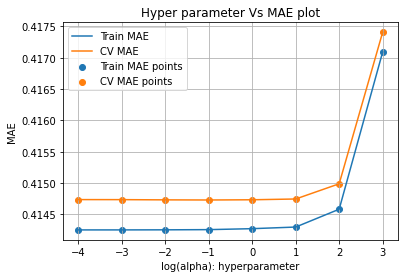

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
4,1.170438,1.441245,0.020582,0.001548,0,{'alpha': 0},-0.412147,-0.413767,-0.416546,-0.415422,-2.376311e+07,-4.752622e+06,9.505243e+06,9,-0.414919,-0.414524,-0.413800,-0.414085,-0.413944,-0.414254,0.000411
0,0.486564,0.038613,0.018593,0.001045,0.0001,{'alpha': 0.0001},-0.412147,-0.413767,-0.416546,-0.415421,-4.158044e-01,-4.147370e-01,1.582934e-03,5,-0.414919,-0.414524,-0.413800,-0.414085,-0.413940,-0.414254,0.000412
1,0.461973,0.010478,0.019931,0.002618,0.001,{'alpha': 0.001},-0.412147,-0.413766,-0.416546,-0.415418,-4.158044e-01,-4.147363e-01,1.582654e-03,4,-0.414919,-0.414524,-0.413800,-0.414086,-0.413940,-0.414254,0.000412
2,0.457996,0.005799,0.019667,0.002492,0.01,{'alpha': 0.01},-0.412148,-0.413764,-0.416546,-0.415401,-4.158043e-01,-4.147328e-01,1.581205e-03,2,-0.414919,-0.414525,-0.413800,-0.414090,-0.413940,-0.414255,0.000412
3,0.446744,0.004196,0.021146,0.001428,0.1,{'alpha': 0.1},-0.412153,-0.413762,-0.416548,-0.415386,-4.158041e-01,-4.147307e-01,1.579085e-03,1,-0.414922,-0.414528,-0.413803,-0.414097,-0.413940,-0.414258,0.000412
5,0.490915,0.042067,0.021774,0.002423,1,{'alpha': 1},-0.412167,-0.413760,-0.416551,-0.415384,-4.158091e-01,-4.147341e-01,1.576129e-03,3,-0.414939,-0.414548,-0.413821,-0.414118,-0.413941,-0.414273,0.000414
6,0.461553,0.018243,0.019320,0.001254,10,{'alpha': 10},-0.412197,-0.413780,-0.416549,-0.415390,-4.158170e-01,-4.147466e-01,1.564715e-03,6,-0.414961,-0.414579,-0.413850,-0.414148,-0.413957,-0.414299,0.000414
7,0.446073,0.012549,0.018834,0.000992,100,{'alpha': 100},-0.412487,-0.414013,-0.416742,-0.415651,-4.160530e-01,-4.149892e-01,1.539778e-03,7,-0.415228,-0.414860,-0.414148,-0.414449,-0.414231,-0.414584,0.000406
8,0.424052,0.064272,0.017349,0.001767,1000,{'alpha': 1000},-0.415086,-0.416481,-0.418971,-0.418090,-4.183996e-01,-4.174054e-01,1.424350e-03,8,-0.417700,-0.417356,-0.416713,-0.416918,-0.416762,-0.417090,0.000380


In [39]:
print('best parameter : ',grid_search.best_params_)

results = pd.DataFrame.from_dict(grid_search.cv_results_)

results = results.sort_values(['param_alpha'])


train_MAE= np.abs(results['mean_train_score'])
train_MAE_std= results['std_score_time']
cv_MAE = np.abs(results['mean_test_score'] )
cv_MAE_std= results['std_test_score']
alpha =  results['param_alpha']
alpha = (np.log10(list(alpha)))

plt.plot((alpha),train_MAE, label='Train MAE')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(alpha, cv_MAE, label='CV MAE')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter((alpha), train_MAE, label='Train MAE points')
plt.scatter((alpha), cv_MAE, label='CV MAE points')


plt.legend()
plt.xlabel("log(alpha): hyperparameter")
plt.ylabel("MAE")
plt.title("Hyper parameter Vs MAE plot")
plt.grid()
plt.show()

results

In [40]:
model2 = Ridge(alpha = 0.1)

model2.fit(X_train1,y_train)

y_train_pred = model2.predict(X_train1)
y_test_pred = model2.predict(X_test1)


y_train_pred1 = np.exp(y_train_pred)- shift
y_test_pred1 = np.exp(y_test_pred) - shift

y_train1 = np.exp(y_train)- shift
y_test1 = np.exp(y_test) - shift

train_score =  mean_absolute_error(y_train_pred1,y_train1)
test_score = mean_absolute_error(y_test_pred1,y_test1)

print('train MAE = ',train_score)
print('test MAE = ',test_score)

train MAE =  1308.3348360102798
test MAE =  1310.9578653816402


### **LB Score**

In [41]:
prediction_test = model2.predict(X_test_lb_encoded)
prediction_test = np.exp(prediction_test)-200

print(prediction_test)

sub = pd.read_csv('/content/sample_submission.csv')
print(sub.shape)

sub['loss'] = prediction_test

sub.to_csv('submissions_ridge_regression.csv', index=False)

[ 1414.19558065  1808.37246184 12898.41390731 ...  2241.18915359
  1077.99708877  2519.41694629]
(125546, 2)


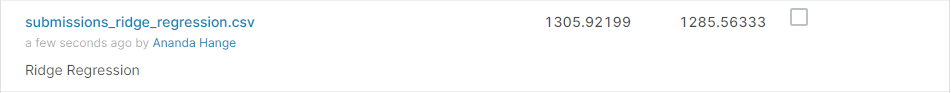

## **C. Linear Regression**

In [42]:
model3 = LinearRegression()

model3.fit(X_train1,y_train)

y_train_pred = model3.predict(X_train1)
y_test_pred = model3.predict(X_test1)


y_train_pred1 = np.exp(y_train_pred)- shift
y_test_pred1 = np.exp(y_test_pred) - shift

y_train1 = np.exp(y_train)- shift
y_test1 = np.exp(y_test) - shift

train_score =  mean_absolute_error(y_train_pred1,y_train1)
test_score = mean_absolute_error(y_test_pred1,y_test1)

print('train MAE = ',train_score)
print('test MAE = ',test_score)



train MAE =  1308.3627555338
test MAE =  1311.0300077833188


### **LB Score**

In [43]:
prediction_test = model3.predict(X_test_lb_encoded)
prediction_test = np.exp(prediction_test)-200

print(prediction_test)

sub = pd.read_csv('/content/sample_submission.csv')
print(sub.shape)

sub['loss'] = prediction_test

sub.to_csv('submissions_linear_regression.csv', index=False)

[ 1413.97636656  1808.1065222  12896.01171819 ...  2240.88362469
  1078.04966283  2518.95183482]
(125546, 2)


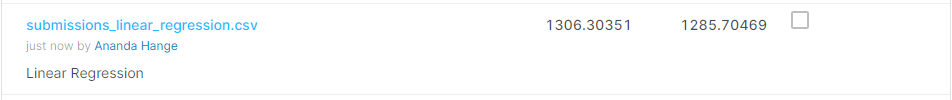

## **D. Knn Regression**

### **i. Without Hyper-parameter Tunning**

In [ ]:
model4 =  KNeighborsRegressor()

model4.fit(X_train1,y_train)

y_train_pred = model4.predict(X_train1)
y_test_pred = model4.predict(X_test1)


y_train_pred1 = np.exp(y_train_pred)- shift
y_test_pred1 = np.exp(y_test_pred) - shift

y_train1 = np.exp(y_train)- shift
y_test1 = np.exp(y_test) - shift

train_score =  mean_absolute_error(y_train_pred1,y_train1)
test_score = mean_absolute_error(y_test_pred1,y_test1)

print('train MAE = ',train_score)
print('test MAE = ',test_score)

train MAE =  1353.4697630108446
test MAE =  1602.2558315933863


### **ii . With Hyper-parameter Tunning**

In [45]:
model4 =  KNeighborsRegressor()


#scoring = {'MAE': make_scorer(mean_absolute_error), 'RMSE': 'neg_root_mean_squared_error'}
#define your own mse and set greater_is_better=False
#mse = make_scorer(mean_absolute_error,greater_is_better=False)
param_grid = {

    'n_neighbors': [1,3,6,12,20]

}


grid_search = GridSearchCV(estimator = model4 , param_grid = param_grid, cv = 5,scoring='neg_mean_absolute_error',return_train_score=True,verbose = 1,refit =True,n_jobs =-1 )
grid_search.fit(X_train1,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 94.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 6, 12, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

best parameter :  {'n_neighbors': 12}


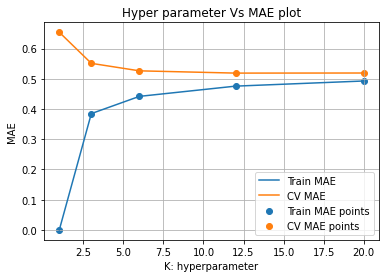

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.015197,0.142628,60.955239,0.607524,1,{'n_neighbors': 1},-0.657727,-0.653494,-0.655167,-0.652882,-0.651213,-0.654097,0.002213,5,-0.000001,-0.000001,-0.000000,-0.000001,-0.000000,-8.101347e-07,6.614722e-07
1,6.088042,0.127746,81.160139,0.256614,3,{'n_neighbors': 3},-0.550845,-0.554357,-0.551940,-0.549754,-0.549003,-0.551180,0.001874,4,-0.385244,-0.384392,-0.384596,-0.384821,-0.385523,-3.849152e-01,4.154457e-04
2,6.169605,0.022291,96.199083,0.631567,6,{'n_neighbors': 6},-0.526657,-0.528738,-0.527393,-0.524850,-0.524416,-0.526411,0.001604,3,-0.442045,-0.441298,-0.441207,-0.442369,-0.442617,-4.419073e-01,5.652658e-04
3,6.133847,0.026166,114.597453,0.669929,12,{'n_neighbors': 12},-0.517725,-0.520749,-0.520245,-0.518106,-0.517628,-0.518891,0.001331,1,-0.476121,-0.475386,-0.475516,-0.475801,-0.475937,-4.757522e-01,2.691646e-04
4,6.140550,0.024264,130.675533,0.799344,20,{'n_neighbors': 20},-0.517769,-0.520649,-0.519540,-0.519300,-0.518707,-0.519193,0.000950,2,-0.493270,-0.492402,-0.492834,-0.492569,-0.492838,-4.927826e-01,2.946343e-04


In [50]:
print('best parameter : ',grid_search.best_params_)

results = pd.DataFrame.from_dict(grid_search.cv_results_)

results = results.sort_values(['param_n_neighbors'])


train_MAE= np.abs(results['mean_train_score'])
train_MAE_std= results['std_score_time']
cv_MAE = np.abs(results['mean_test_score'] )
cv_MAE_std= results['std_test_score']
K =  results['param_n_neighbors']
#alpha = (np.log10(list(alpha)))

plt.plot(K,train_MAE, label='Train MAE')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_MAE, label='CV MAE')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_MAE, label='Train MAE points')
plt.scatter(K, cv_MAE, label='CV MAE points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("MAE")
plt.title("Hyper parameter Vs MAE plot")
plt.grid()
plt.show()

results

In [51]:
model4 =  KNeighborsRegressor(n_neighbors=12)

model4.fit(X_train1,y_train)

y_train_pred = model4.predict(X_train1)
y_test_pred = model4.predict(X_test1)


y_train_pred1 = np.exp(y_train_pred)- shift
y_test_pred1 = np.exp(y_test_pred) - shift

y_train1 = np.exp(y_train)- shift
y_test1 = np.exp(y_test) - shift

train_score =  mean_absolute_error(y_train_pred1,y_train1)
test_score = mean_absolute_error(y_test_pred1,y_test1)

print('train MAE = ',train_score)
print('test MAE = ',test_score)

train MAE =  1483.7302243814067
test MAE =  1584.8092246525152


### **LB Score**

In [52]:
prediction_test = model4.predict(X_test_lb_encoded)
prediction_test = np.exp(prediction_test)-200

print(prediction_test)

sub = pd.read_csv('/content/sample_submission.csv')
print(sub.shape)

sub['loss'] = prediction_test

sub.to_csv('submissions_knn_regression.csv', index=False)

[2004.61767961 1903.8429742  5398.47649674 ... 2660.97940346 1266.25256864
 1630.13003929]
(125546, 2)


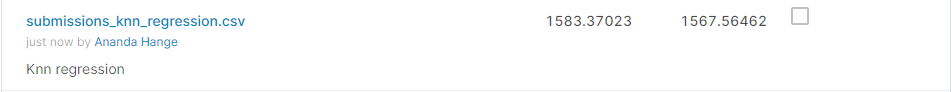

## **E. Support Vector Regression**

In [ ]:
model5 = SVR()

model5.fit(X_tr_label_encoded,y_train)

y_train_pred = model5.predict(X_tr_label_encoded)
y_test_pred = model5.predict(X_te_label_encoded)

train_score =  mean_absolute_error(y_train_pred,y_train)
test_score = mean_absolute_error(y_test_pred,y_test)

print('train MAE = ',train_score)
print('test MAE = ',test_score)

## **F. Decision Tree Regression**

### **i. Without Hyper-parameter Tunning**

In [ ]:
model6 = DecisionTreeRegressor()

model6.fit(X_train1,y_train)

y_train_pred = model6.predict(X_train1)
y_test_pred = model6.predict(X_test1)


y_train_pred1 = np.exp(y_train_pred)- shift
y_test_pred1 = np.exp(y_test_pred) - shift

y_train1 = np.exp(y_train)- shift
y_test1 = np.exp(y_test) - shift

train_score =  mean_absolute_error(y_train_pred1,y_train1)
test_score = mean_absolute_error(y_test_pred1,y_test1)

print('train MAE = ',train_score)
print('test MAE = ',test_score)

train MAE =  0.004901141904006534
test MAE =  1758.6447541826535


### **ii. With Hyperparameter Tuning**

In [ ]:
model6 = DecisionTreeRegressor(random_state=5)

param_grid = {
    'max_depth': [3,5,8,10,15,20],
    'min_samples_split': [1,2,3,5,8,10,15],
    'min_samples_leaf' : [2,5,10,25,50]
}

grid_search = GridSearchCV(estimator = model6 , param_grid = param_grid, cv = 3,scoring='neg_mean_absolute_error',return_train_score=True,verbose = 1,refit =True,n_jobs =-1 )
grid_search.fit(X_train1,y_train)

Fitting 3 folds for each of 210 candidates, totalling 630 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed: 13.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=5, splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 5, 8, 10, 15, 20],
                         'min_samples_leaf': [2, 5, 10, 25, 50],
                         'min_samples_split': [1, 2, 3, 5, 8, 10, 15]},
       

In [ ]:
print('Best Hyperparameter: ',grid_search.best_params_)
print('Best Estimator : ',grid_search.best_estimator_)
results = pd.DataFrame.from_dict(grid_search.cv_results_)

Best Hyperparameter:  {'max_depth': 15, 'min_samples_leaf': 50, 'min_samples_split': 2}
Best Estimator :  DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')


In [53]:
model6 =   DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=50, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best')

model6.fit(X_train1,y_train)

y_train_pred = model6.predict(X_train1)
y_test_pred = model6.predict(X_test1)


y_train_pred1 = np.exp(y_train_pred)- shift
y_test_pred1 = np.exp(y_test_pred) - shift

y_train1 = np.exp(y_train)- shift
y_test1 = np.exp(y_test) - shift

train_score =  mean_absolute_error(y_train_pred1,y_train1)
test_score = mean_absolute_error(y_test_pred1,y_test1)

print('train MAE = ',train_score)
print('test MAE = ',test_score)

train MAE =  1197.7849524728547
test MAE =  1282.8579290834452


### **LB Score**

In [54]:
prediction_test = model6.predict(X_test_lb_encoded)
prediction_test = np.exp(prediction_test)-200

print(prediction_test)

sub = pd.read_csv('/content/sample_submission.csv')
print(sub.shape)

sub['loss'] = prediction_test

sub.to_csv('submissions_DT_regression.csv', index=False)

[1777.17589288 2336.38658284 8642.70945229 ... 2691.33829544 1053.08648478
 3924.4884321 ]
(125546, 2)


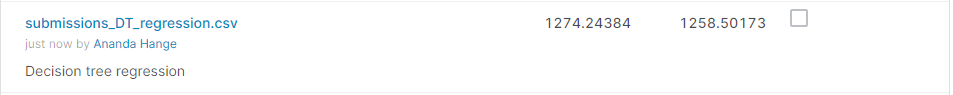

## **G. Random Forest**

In [ ]:
model7 = RandomForestRegressor(n_jobs = -1)
model7.fit(X_train1,y_train)

y_train_pred = model7.predict(X_train1)
y_test_pred = model7.predict(X_test1)


y_train_pred1 = np.exp(y_train_pred)- shift
y_test_pred1 = np.exp(y_test_pred) - shift

y_train1 = np.exp(y_train)- shift
y_test1 = np.exp(y_test) - shift

train_score =  mean_absolute_error(y_train_pred1,y_train1)
test_score = mean_absolute_error(y_test_pred1,y_test1)

print('train MAE = ',train_score)
print('test MAE = ',test_score)


train MAE =  489.240968007482
test MAE =  1214.6768890511696


In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)] #[200.,400.,600.,800.,1000.,1200.,1400.,1600.,1800.,2000.]
# Number of features to consider at every split
max_features = ['auto','sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10,110,num = 11)]  #[10.,20.,30.,40.,50.,60.,70.,80.,90.,100.,110.]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


random_grid = {
              #'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
               }


# Use the random grid to search for best hyperparameters
# First create the base model to tune
model7 = RandomForestRegressor(n_jobs = -1)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
grid_search = RandomizedSearchCV(estimator = model7, param_distributions = random_grid,scoring='neg_mean_absolute_error', n_iter = 100, cv = 3,return_train_score=True, verbose=2, random_state=42)

grid_search.fit(X_tr_label_encoded,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] min_samples_split=2, max_depth=10 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ min_samples_split=2, max_depth=10, total= 2.3min
[CV] min_samples_split=2, max_depth=10 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] ................ min_samples_split=2, max_depth=10, total= 2.2min
[CV] min_samples_split=2, max_depth=10 ...............................
[CV] ................ min_samples_split=2, max_depth=10, total= 2.2min
[CV] min_samples_split=5, max_depth=10 ...............................
[CV] ................ min_samples_split=5, max_depth=10, total= 2.3min
[CV] min_samples_split=5, max_depth=10 ...............................
[CV] ................ min_samples_split=5, max_depth=10, total= 2.3min
[CV] min_samples_split=5, max_depth=10 ...............................
[CV] ................ min_samples_split=5, max_depth=10, total= 2.3min
[CV] min_samples_split=10, max_depth=10 ..............................
[CV] ............... min_samples_split=10, max_depth=10, total= 2.2min
[CV] min_samples_split=10, max_depth=10 ..............................
[CV] ............... min_samples_split=10, max_depth=10, total= 2.2min
[CV] min_samples_split=10, max_depth=10 ..............................
[CV] .

In [55]:
model7 = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=70, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
model7.fit(X_train1,y_train)

y_train_pred = model7.predict(X_train1)
y_test_pred = model7.predict(X_test1)


y_train_pred1 = np.exp(y_train_pred)- shift
y_test_pred1 = np.exp(y_test_pred) - shift

y_train1 = np.exp(y_train)- shift
y_test1 = np.exp(y_test) - shift

train_score =  mean_absolute_error(y_train_pred1,y_train1)
test_score = mean_absolute_error(y_test_pred1,y_test1)

print('train MAE = ',train_score)
print('test MAE = ',test_score)


train MAE =  485.1276707320716
test MAE =  1210.4364291136585


### **LB Score**

In [59]:
prediction_test = model7.predict(X_test_lb_encoded)
prediction_test = np.exp(prediction_test)-200

print(prediction_test)

sub = pd.read_csv('/content/sample_submission.csv')
print(sub.shape)

sub['loss'] = prediction_test

sub.to_csv('submissions_RF_regression.csv', index=False)

[1565.53242378 2088.53483166 8156.33537382 ... 3129.46370764 1070.14682619
 3434.47860419]
(125546, 2)


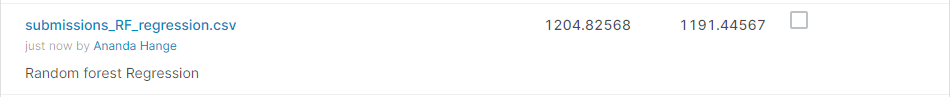

## **Adaboost**

In [57]:
Adaboost = AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                   n_estimators=50, random_state=None)
Adaboost.fit(X_train1,y_train)

y_train_pred = Adaboost.predict(X_train1)
y_test_pred = Adaboost.predict(X_test1)


y_train_pred1 = np.exp(y_train_pred)- shift
y_test_pred1 = np.exp(y_test_pred) - shift

y_train1 = np.exp(y_train)- shift
y_test1 = np.exp(y_test) - shift

train_score =  mean_absolute_error(y_train_pred1,y_train1)
test_score = mean_absolute_error(y_test_pred1,y_test1)

print('train MAE = ',train_score)
print('test MAE = ',test_score)


train MAE =  1436.3332265832162
test MAE =  1441.1649825016586


### **LB Score**

In [58]:
prediction_test = Adaboost.predict(X_test_lb_encoded)
prediction_test = np.exp(prediction_test)-200

print(prediction_test)

sub = pd.read_csv('/content/sample_submission.csv')
print(sub.shape)

sub['loss'] = prediction_test

sub.to_csv('submissions_Adaboost_regression.csv', index=False)

[2138.79203076 1563.55214314 4858.98805642 ... 2140.09562262 1563.55214314
 4340.470246  ]
(125546, 2)


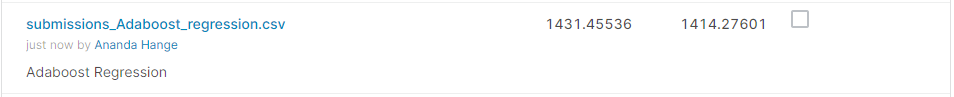

# **XGBoost**

Here we do hyperparameter tunning for Xgboost.

In [ ]:
'''
Here we evaluate model performance . We use here xgboost cv function that will do crossvalidation for us
and will gives us number of boosting round required for training xgboost .And that we will use as number of trees or n_estimator.
'''


def evaluate(xgb1,X_train1,y_train):
  shift = 200
  xgb_param = xgb1.get_xgb_params()

  xgb_train = xgb.DMatrix(X_train1,y_train)
  cvresult = xgb.cv(xgb_param,xgb_train,num_boost_round=xgb1.get_params()['n_estimators'],nfold = 10 ,metrics=['mae'],
                  early_stopping_rounds=100)

  xgb1.set_params(n_estimators=cvresult.shape[0])
  print('Number of estimators: ',cvresult.shape[0])

  xgb1.fit(X_train1,y_train,eval_metric='mae')

  y_train_pred = xgb1.predict(X_train1)
  y_test_pred = xgb1.predict(X_test1)


  y_train_pred1 = np.exp(y_train_pred)- shift
  y_test_pred1 = np.exp(y_test_pred) - shift

  y_train1 = np.exp(y_train)- shift
  y_test1 = np.exp(y_test) - shift

  train_score =  mean_absolute_error(y_train_pred1,y_train1)
  test_score = mean_absolute_error(y_test_pred1,y_test1)

  print('train MAE = ',train_score)
  print('test MAE = ',test_score)

We first randomy initializing some parameter to start with.

We keep all parameter fixed except learnig_rate(0.01,0.05,0.1). we  get number of boosting round from evaluate custom function.And that we used as n_estimators.

In [ ]:
xgb1 = XGBRegressor(learning_rate =0.03,n_estimators=5000,max_depth=5,min_child_weight=1,
                      gamma=0,subsample=0.8,colsample_bytree=0.8,tree_method='gpu_hist',
                      prdictor = 'gpu_predictor',objective = 'reg:squarederror',nthread=4)


evaluate(xgb1,X_train1,y_train)



Number of estimators:  2531
train MAE =  1041.5731428955512
test MAE =  1136.0040937726094


Here we get good score for learning rate =0.03 and gives boosting round as 2531 which will be our n_estimators.

### Tunning  **Max_depth** and **min_chid_weight**

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
clf = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, tree_method='gpu_hist', verbosity=1)

gsearch1 = GridSearchCV(estimator =clf,param_grid = param_test1,scoring='neg_mean_absolute_error',cv = 5,verbose=3)
gsearch1.fit(X_train1,y_train)

gsearch1.best_params_,gsearch1.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=3, min_child_weight=1 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... max_depth=3, min_child_weight=1, score=-0.374, total=  24.2s
[CV] max_depth=3, min_child_weight=1 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.2s remaining:    0.0s


[CV] .... max_depth=3, min_child_weight=1, score=-0.376, total=  24.3s
[CV] max_depth=3, min_child_weight=1 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   48.6s remaining:    0.0s


[CV] .... max_depth=3, min_child_weight=1, score=-0.378, total=  24.0s
[CV] max_depth=3, min_child_weight=1 .................................
[CV] .... max_depth=3, min_child_weight=1, score=-0.375, total=  23.9s
[CV] max_depth=3, min_child_weight=1 .................................
[CV] .... max_depth=3, min_child_weight=1, score=-0.376, total=  23.9s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .... max_depth=3, min_child_weight=3, score=-0.374, total=  24.1s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .... max_depth=3, min_child_weight=3, score=-0.376, total=  24.1s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .... max_depth=3, min_child_weight=3, score=-0.378, total=  24.0s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .... max_depth=3, min_child_weight=3, score=-0.375, total=  23.9s
[CV] max_depth=3, min_child_weight=3 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 47.7min finished


({'max_depth': 5, 'min_child_weight': 5},
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, tree_method='gpu_hist', verbosity=1))

In [ ]:
gsearch1.best_params_,gsearch1.best_estimator_

({'max_depth': 5, 'min_child_weight': 5},
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, tree_method='gpu_hist', verbosity=1))

After grid search we will get {'max_depth': 5, 'min_child_weight': 5}

In [ ]:
'''
evaluate model on {'max_depth': 5, 'min_child_weight': 5}
''' 

xgb1 =  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, tree_method='gpu_hist', verbosity=1)


evaluate(xgb1,X_train1,y_train)

Number of estimators:  2531
train MAE =  1042.9226422935565
test MAE =  1135.9570794874141


Now go deep to max_depth and min_child_weight

In [ ]:
param_test1b = {
 'max_depth':[4,5,6],
 'min_child_weight':[4,5,6]
}
clf = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, tree_method='gpu_hist', verbosity=1)

gsearch2 = GridSearchCV(estimator =clf,param_grid = param_test1b,scoring='neg_mean_absolute_error',cv = 5,verbose=3)
gsearch2.fit(X_train1,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=4, min_child_weight=4 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... max_depth=4, min_child_weight=4, score=-0.372, total=  27.0s
[CV] max_depth=4, min_child_weight=4 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.0s remaining:    0.0s


[CV] .... max_depth=4, min_child_weight=4, score=-0.373, total=  27.1s
[CV] max_depth=4, min_child_weight=4 .................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   54.1s remaining:    0.0s


[CV] .... max_depth=4, min_child_weight=4, score=-0.375, total=  26.5s
[CV] max_depth=4, min_child_weight=4 .................................
[CV] .... max_depth=4, min_child_weight=4, score=-0.372, total=  26.5s
[CV] max_depth=4, min_child_weight=4 .................................
[CV] .... max_depth=4, min_child_weight=4, score=-0.373, total=  26.5s
[CV] max_depth=4, min_child_weight=5 .................................
[CV] .... max_depth=4, min_child_weight=5, score=-0.372, total=  26.8s
[CV] max_depth=4, min_child_weight=5 .................................
[CV] .... max_depth=4, min_child_weight=5, score=-0.373, total=  26.9s
[CV] max_depth=4, min_child_weight=5 .................................
[CV] .... max_depth=4, min_child_weight=5, score=-0.375, total=  26.6s
[CV] max_depth=4, min_child_weight=5 .................................
[CV] .... max_depth=4, min_child_weight=5, score=-0.372, total=  26.5s
[CV] max_depth=4, min_child_weight=5 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 23.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.8, gamma=0,
                                    importance_type='gain', learning_rate=0.03,
                                    max_delta_step=0, max_depth=5,
                                    min_child_weight=5, missing=None,
                                    n_estimators=2531, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    prdictor='gpu_predictor', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=0.8, tree_method='gpu_hist',
                                    verbosity=1),
             iid='deprecated', n_jobs=None

In [ ]:
gsearch2.best_params_,gsearch2.best_estimator_

({'max_depth': 5, 'min_child_weight': 5},
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, tree_method='gpu_hist', verbosity=1))

**Tune gamma**

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}


clf = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, tree_method='gpu_hist', verbosity=1)

gsearch3 = GridSearchCV(estimator =clf,param_grid = param_test3,scoring='neg_mean_absolute_error',cv = 3,verbose=2)
gsearch3.fit(X_train1,y_train)

gsearch3.best_params_,gsearch3.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] gamma=0.0 .......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................................ gamma=0.0, total=  23.7s
[CV] gamma=0.0 .......................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.7s remaining:    0.0s


[CV] ........................................ gamma=0.0, total=  23.1s
[CV] gamma=0.0 .......................................................
[CV] ........................................ gamma=0.0, total=  23.1s
[CV] gamma=0.1 .......................................................
[CV] ........................................ gamma=0.1, total=  23.7s
[CV] gamma=0.1 .......................................................
[CV] ........................................ gamma=0.1, total=  23.1s
[CV] gamma=0.1 .......................................................
[CV] ........................................ gamma=0.1, total=  23.1s
[CV] gamma=0.2 .......................................................
[CV] ........................................ gamma=0.2, total=  23.7s
[CV] gamma=0.2 .......................................................
[CV] ........................................ gamma=0.2, total=  23.1s
[CV] gamma=0.2 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  5.8min finished


({'gamma': 0.0},
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, tree_method='gpu_hist', verbosity=1))

In [ ]:
model8 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, tree_method='gpu_hist', verbosity=1)

evaluate(model8,X_train1,y_train)

Number of estimators:  2531
train MAE =  1042.9226422935565
test MAE =  1135.9570794874141


Till here our score improved a bit.

Now we tune **subsample** and **colsample_bytree**

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(5,11)],
 'colsample_bytree':[i/10.0 for i in range(5,11)],

}


clf = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, tree_method='gpu_hist', verbosity=1)

gsearch4 = GridSearchCV(estimator =clf,param_grid = param_test4,scoring='neg_mean_absolute_error',cv = 5,verbose=2)
gsearch4.fit(X_train1,y_train)

gsearch4.best_params_,gsearch4.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] colsample_bytree=0.5, subsample=0.5 .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. colsample_bytree=0.5, subsample=0.5, total=  25.5s
[CV] colsample_bytree=0.5, subsample=0.5 .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.5s remaining:    0.0s


[CV] .............. colsample_bytree=0.5, subsample=0.5, total=  26.0s
[CV] colsample_bytree=0.5, subsample=0.5 .............................
[CV] .............. colsample_bytree=0.5, subsample=0.5, total=  25.9s
[CV] colsample_bytree=0.5, subsample=0.5 .............................
[CV] .............. colsample_bytree=0.5, subsample=0.5, total=  25.5s
[CV] colsample_bytree=0.5, subsample=0.5 .............................
[CV] .............. colsample_bytree=0.5, subsample=0.5, total=  25.5s
[CV] colsample_bytree=0.5, subsample=0.6 .............................
[CV] .............. colsample_bytree=0.5, subsample=0.6, total=  25.5s
[CV] colsample_bytree=0.5, subsample=0.6 .............................
[CV] .............. colsample_bytree=0.5, subsample=0.6, total=  26.0s
[CV] colsample_bytree=0.5, subsample=0.6 .............................
[CV] .............. colsample_bytree=0.5, subsample=0.6, total=  26.0s
[CV] colsample_bytree=0.5, subsample=0.6 .............................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 76.6min finished


({'colsample_bytree': 0.6, 'subsample': 0.9},
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1))

we get {'colsample_bytree': 0.6, 'subsample': 0.9}

In [ ]:
# evaluate model on {'colsample_bytree': 0.6, 'subsample': 0.9}

clf = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1)

evaluate(clf,X_train1,y_train)

Number of estimators:  2531
train MAE =  1046.9698193716538
test MAE =  1136.2025765370877


We go more deep into **subsample** and **min_child_weight**

In [ ]:
param_test4b = {
 'subsample':[0.85,0.9,0.95],
 'colsample_bytree':[0.55,0.6,0.65],

}


clf = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1)

gsearch4 = GridSearchCV(estimator =clf,param_grid = param_test4b,scoring='neg_mean_absolute_error',cv = 5,verbose=2)
gsearch4.fit(X_train1,y_train)

gsearch4.best_params_,gsearch4.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] colsample_bytree=0.55, subsample=0.85 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ colsample_bytree=0.55, subsample=0.85, total=  25.5s
[CV] colsample_bytree=0.55, subsample=0.85 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.5s remaining:    0.0s


[CV] ............ colsample_bytree=0.55, subsample=0.85, total=  25.9s
[CV] colsample_bytree=0.55, subsample=0.85 ...........................
[CV] ............ colsample_bytree=0.55, subsample=0.85, total=  25.7s
[CV] colsample_bytree=0.55, subsample=0.85 ...........................
[CV] ............ colsample_bytree=0.55, subsample=0.85, total=  25.3s
[CV] colsample_bytree=0.55, subsample=0.85 ...........................
[CV] ............ colsample_bytree=0.55, subsample=0.85, total=  25.2s
[CV] colsample_bytree=0.55, subsample=0.9 ............................
[CV] ............. colsample_bytree=0.55, subsample=0.9, total=  25.1s
[CV] colsample_bytree=0.55, subsample=0.9 ............................
[CV] ............. colsample_bytree=0.55, subsample=0.9, total=  25.6s
[CV] colsample_bytree=0.55, subsample=0.9 ............................
[CV] ............. colsample_bytree=0.55, subsample=0.9, total=  25.5s
[CV] colsample_bytree=0.55, subsample=0.9 ............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 19.0min finished


({'colsample_bytree': 0.6, 'subsample': 0.9},
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1))

Still we get same same result as {'colsample_bytree': 0.6, 'subsample': 0.9}

Now moving further to **colsample_bylevel**

In [ ]:
param_test5 = {
 #'subsample':[i/10.0 for i in range(5,11)],
 'colsample_bylevel':[i/10.0 for i in range(5,11)],

}


clf = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1)

gsearch5 = GridSearchCV(estimator =clf,param_grid = param_test5,scoring='neg_mean_absolute_error',cv = 5,verbose=2)
gsearch5.fit(X_train1,y_train)

gsearch5.best_params_,gsearch5.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] colsample_bylevel=0.5 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ colsample_bylevel=0.5, total=  25.3s
[CV] colsample_bylevel=0.5 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.3s remaining:    0.0s


[CV] ............................ colsample_bylevel=0.5, total=  25.7s
[CV] colsample_bylevel=0.5 ...........................................
[CV] ............................ colsample_bylevel=0.5, total=  25.6s
[CV] colsample_bylevel=0.5 ...........................................
[CV] ............................ colsample_bylevel=0.5, total=  25.2s
[CV] colsample_bylevel=0.5 ...........................................
[CV] ............................ colsample_bylevel=0.5, total=  25.2s
[CV] colsample_bylevel=0.6 ...........................................
[CV] ............................ colsample_bylevel=0.6, total=  25.3s
[CV] colsample_bylevel=0.6 ...........................................
[CV] ............................ colsample_bylevel=0.6, total=  25.7s
[CV] colsample_bylevel=0.6 ...........................................
[CV] ............................ colsample_bylevel=0.6, total=  25.7s
[CV] colsample_bylevel=0.6 ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 12.7min finished


({'colsample_bylevel': 0.9},
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1))

We get {'colsample_bylevel': 0.9}

We go bit deep into **colsample_bylevel**

In [ ]:
param_test5b = {
 #'subsample':[i/10.0 for i in range(5,11)],
 'colsample_bylevel':[0.85,9,9.5],

}


clf = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1)

gsearch5 = GridSearchCV(estimator =clf,param_grid = param_test5b,scoring='neg_mean_absolute_error',cv = 5,verbose=2)
gsearch5.fit(X_train1,y_train)

gsearch5.best_params_,gsearch5.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] colsample_bylevel=0.85 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ........................... colsample_bylevel=0.85, total=  25.3s
[CV] colsample_bylevel=0.85 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.3s remaining:    0.0s


[CV] ........................... colsample_bylevel=0.85, total=  25.8s
[CV] colsample_bylevel=0.85 ..........................................
[CV] ........................... colsample_bylevel=0.85, total=  25.7s
[CV] colsample_bylevel=0.85 ..........................................
[CV] ........................... colsample_bylevel=0.85, total=  25.3s
[CV] colsample_bylevel=0.85 ..........................................
[CV] ........................... colsample_bylevel=0.85, total=  25.2s
[CV] colsample_bylevel=9 .............................................
[CV] .............................. colsample_bylevel=9, total=   0.3s
[CV] colsample_bylevel=9 .............................................
[CV] .............................. colsample_bylevel=9, total=   0.3s
[CV] colsample_bylevel=9 .............................................
[CV] .............................. colsample_bylevel=9, total=   0.3s
[CV] colsample_bylevel=9 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.2min finished


({'colsample_bylevel': 0.85},
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.85,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1))

Here we get colsample_bylevel = 0.85


Now we tunne requlaizers (L1:alpha and L2:lambda)

In [ ]:
param_test6 = {
 'reg_alpha':[1e-2, 0.1 ,0, 1, 10, 100],
 'reg_lambda':[1e-2, 0.1 ,0 ,1 ,10 , 100]
}

clf = gsearch5.best_estimator_

gsearch6 = GridSearchCV(estimator =clf,param_grid = param_test6,scoring='neg_mean_absolute_error',cv = 3,verbose=2)
gsearch6.fit(X_train1,y_train)

gsearch6.best_params_,gsearch6.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] reg_alpha=0.01, reg_lambda=0.01 .................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................. reg_alpha=0.01, reg_lambda=0.01, total=  23.3s
[CV] reg_alpha=0.01, reg_lambda=0.01 .................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.3s remaining:    0.0s


[CV] .................. reg_alpha=0.01, reg_lambda=0.01, total=  22.9s
[CV] reg_alpha=0.01, reg_lambda=0.01 .................................
[CV] .................. reg_alpha=0.01, reg_lambda=0.01, total=  22.9s
[CV] reg_alpha=0.01, reg_lambda=0.1 ..................................
[CV] ................... reg_alpha=0.01, reg_lambda=0.1, total=  23.4s
[CV] reg_alpha=0.01, reg_lambda=0.1 ..................................
[CV] ................... reg_alpha=0.01, reg_lambda=0.1, total=  22.9s
[CV] reg_alpha=0.01, reg_lambda=0.1 ..................................
[CV] ................... reg_alpha=0.01, reg_lambda=0.1, total=  22.9s
[CV] reg_alpha=0.01, reg_lambda=0 ....................................
[CV] ..................... reg_alpha=0.01, reg_lambda=0, total=  23.4s
[CV] reg_alpha=0.01, reg_lambda=0 ....................................
[CV] ..................... reg_alpha=0.01, reg_lambda=0, total=  22.9s
[CV] reg_alpha=0.01, reg_lambda=0 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 42.0min finished


({'reg_alpha': 10, 'reg_lambda': 0},
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=10,
              reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1))

we get {'reg_alpha': 10, 'reg_lambda': 0}

In [ ]:
#we go more deep to alpha now:

param_test6 = {
 'reg_alpha':[1,3,5,7,10],
}

clf = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.85,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=0,
              reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1)

gsearch6 = GridSearchCV(estimator =clf,param_grid = param_test6,scoring='neg_mean_absolute_error',cv = 3,verbose=2)
gsearch6.fit(X_train1,y_train)

gsearch6.best_params_,gsearch6.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] reg_alpha=1 .....................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................................... reg_alpha=1, total=  23.3s
[CV] reg_alpha=1 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.3s remaining:    0.0s


[CV] ...................................... reg_alpha=1, total=  22.9s
[CV] reg_alpha=1 .....................................................
[CV] ...................................... reg_alpha=1, total=  22.9s
[CV] reg_alpha=3 .....................................................
[CV] ...................................... reg_alpha=3, total=  23.5s
[CV] reg_alpha=3 .....................................................
[CV] ...................................... reg_alpha=3, total=  23.1s
[CV] reg_alpha=3 .....................................................
[CV] ...................................... reg_alpha=3, total=  23.1s
[CV] reg_alpha=5 .....................................................
[CV] ...................................... reg_alpha=5, total=  23.6s
[CV] reg_alpha=5 .....................................................
[CV] ...................................... reg_alpha=5, total=  23.2s
[CV] reg_alpha=5 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  5.8min finished


({'reg_alpha': 7},
 XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.85,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=7,
              reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1))

We get alpha = 7

In [ ]:
'''
Now we combined all this parameter and evaluate model.

'''

clf = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=2531,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=10,
              reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1)

evaluate(clf,X_train1,y_train)

Number of estimators:  2531
train MAE =  1081.6639036096724
test MAE =  1134.2428007049043


Above model gives best test score. so we did improved model with hyperparameter tunning.

Now we will increase n_estimators (nimber of boosting rounds) to see how many boosting round requires to converger cv score.

In [ ]:
clf = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=5000,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=10,
              reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1)

evaluate(clf,X_train1,y_train)

Number of estimators:  3926
train MAE =  1058.7690416915063
test MAE =  1133.025938650243


Finally we get 3926 boosting rounds. and get good test MAE score of 1133.

Which improved bit from 1136 to 1133.

Final Result

In [30]:
import xgboost as xgb
from xgboost import XGBRegressor

final_model =  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=3926,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=10,
              reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1)

final_model.fit(X_train1,y_train)

y_train_pred = final_model.predict(X_train1)
y_test_pred = final_model.predict(X_test1)


y_train_pred1 = np.exp(y_train_pred)- shift
y_test_pred1 = np.exp(y_test_pred) - shift

y_train1 = np.exp(y_train)- shift
y_test1 = np.exp(y_test) - shift

train_score =  mean_absolute_error(y_train_pred1,y_train1)
test_score = mean_absolute_error(y_test_pred1,y_test1)

print('train MAE = ',train_score)
print('test MAE = ',test_score)


train MAE =  1058.7690416915063
test MAE =  1133.025938650243


['/content/finalized_model.sav']

In [44]:
#save
np.save('/content/feature_level_count_train_dict.npy', feature_count_train_dict) 

np.save('/content/categorical_features_train.npy', categorical_features_train)
np.save('/content/label_encoded_map_dict.npy', label_encoded_map_dict) 

In [43]:
#load

read_dictionary = np.load('/content/label_encoded_map_dict.npy',allow_pickle='TRUE').item()
print(read_dictionary['cat89'])


{'G': 0, 'H': 1, 'I': 2, 'E': 3, 'D': 4, 'C': 5, 'B': 6, 'A': 7, nan: -1}


Since we do not transform Continuous features. Let we do min-max scaling and zero mean scaling.

### **1. zero mean scaling.**

In [ ]:
'''
Here we evaluate model performance . We use here xgboost cv function that will do crossvalidation for us
and will gives us number of boosting round required for training xgboost .And that we will use as number of trees or n_estimator.
'''


def evaluate1(xgb1,X_train,y_train,X_test,y_test):
  shift = 200
  xgb_param = xgb1.get_xgb_params()

  xgb_train = xgb.DMatrix(X_train,y_train)

  cvresult = xgb.cv(xgb_param,xgb_train,num_boost_round=xgb1.get_params()['n_estimators'],nfold = 5,metrics=['mae'],
                  early_stopping_rounds=100)

  xgb1.set_params(n_estimators=cvresult.shape[0])
  print('Number of estimators: ',cvresult.shape[0])

  xgb1.fit(X_train,y_train)

  y_train_pred =xgb1.predict(X_train)
  y_test_pred = xgb1.predict(X_test)


  y_train_pred1 = np.exp(y_train_pred)- shift
  y_test_pred1 = np.exp(y_test_pred) - shift

  y_train1 = np.exp(y_train)- shift
  y_test1 = np.exp(y_test) - shift

  train_score =  mean_absolute_error(y_train_pred1,y_train1)
  test_score = mean_absolute_error(y_test_pred1,y_test1)

  print('train MAE = ',train_score)
  print('test MAE = ',test_score)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train12 = X_train1.copy()
X_test12 =X_test1.copy()
scaler.fit(X_train12[continous_features_train])

X_train12[continous_features_train] = scaler.transform(X_train12[continous_features_train])
X_test12[continous_features_train] = scaler.transform(X_test12[continous_features_train])

In [ ]:
clf = XGBRegressor(learning_rate =0.03,n_estimators=5000,max_depth=5,min_child_weight=1,
                      gamma=0,subsample=0.8,colsample_bytree=0.8,tree_method='gpu_hist',
                      prdictor = 'gpu_predictor',objective = 'reg:squarederror',nthread=4)

evaluate1(clf,X_train12,y_train,X_test12,y_test)

Number of estimators:  2531
train MAE =  1041.5731428955512
test MAE =  1136.0040937726094


In [ ]:

xgb1= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=3926,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=10,
              reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1)


xgb1.fit(X_train12,y_train)

y_train_pred = xgb1.predict(X_train12)
y_test_pred = xgb1.predict(X_test12)


y_train_pred1 = np.exp(y_train_pred)- shift
y_test_pred1 = np.exp(y_test_pred) - shift

y_train1 = np.exp(y_train)- shift
y_test1 = np.exp(y_test) - shift

train_score =  mean_absolute_error(y_train_pred1,y_train1)
test_score = mean_absolute_error(y_test_pred1,y_test1)

print('train MAE = ',train_score)
print('test MAE = ',test_score)

train MAE =  1058.7690416915063
test MAE =  1133.025938650243


### **2. Min-max scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train11 = X_train1.copy()
X_test11 =X_test1.copy()
scaler.fit(X_train11[continous_features_train])

X_train11[continous_features_train] = scaler.transform(X_train11[continous_features_train])
X_test11[continous_features_train] = scaler.transform(X_test11[continous_features_train])

In [ ]:
clf = XGBRegressor(learning_rate =0.06,n_estimators=5000,max_depth=5,min_child_weight=1,
                      gamma=0,subsample=0.8,colsample_bytree=0.8,tree_method='gpu_hist',
                      prdictor = 'gpu_predictor',objective = 'reg:squarederror',nthread=4)

evaluate1(clf,X_train11,y_train,X_test11,y_test)

Number of estimators:  1067
train MAE =  1055.8248008784644
test MAE =  1138.6223045251243


In [ ]:

xgb1= XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=3926,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=10,
              reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1)


xgb1.fit(X_train11,y_train)

y_train_pred = xgb1.predict(X_train11)
y_test_pred = xgb1.predict(X_test11)


y_train_pred1 = np.exp(y_train_pred)- shift
y_test_pred1 = np.exp(y_test_pred) - shift

y_train1 = np.exp(y_train)- shift
y_test1 = np.exp(y_test) - shift

train_score =  mean_absolute_error(y_train_pred1,y_train1)
test_score = mean_absolute_error(y_test_pred1,y_test1)

print('train MAE = ',train_score)
print('test MAE = ',test_score)

train MAE =  1058.7690416915063
test MAE =  1133.025938650243


We see both scaling gives worst MAE score.

So we can avoid these type of scaling for this problem.

We tried all encoding with and without target transformation and we get following result.

frequency based label encoding with transformed target is works better compare to other encoding method.

In [ ]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 

print('\t\t\tXGBoost model test MAE score for each encoding type')
myTable = PrettyTable(['target transformed (log+shift)', "Target-encoding", "label+target_encoding", "frequency label encoding"]) 
  
# Add rows 
myTable.add_row(["No", "1230", "1180", "1180"]) 
myTable.add_row(["YES", "1234", "1147", "1133"]) 

  
print(myTable)

			XGBoost model test MAE score for each encoding type
+--------------------------------+-----------------+-----------------------+--------------------------+
| target transformed (log+shift) | Target-encoding | label+target_encoding | frequency label encoding |
+--------------------------------+-----------------+-----------------------+--------------------------+
|               No               |       1230      |          1180         |           1180           |
|              YES               |       1234      |          1147         |           1133           |
+--------------------------------+-----------------+-----------------------+--------------------------+


### **LB Score**

In [39]:
pred_test = model8.predict(X_test_lb_encoded)

In [40]:
pred_test = np.exp(pred_test)-200

pred_test

array([1390.7109, 1926.5015, 9129.421 , ..., 2591.9192, 1026.2649,
       3140.1323], dtype=float32)

In [41]:
sub = pd.read_csv('/content/sample_submission.csv')
sub.shape

(125546, 2)

In [ ]:
sub['loss'] = pred_test

In [ ]:
sub.to_csv('submissions1.csv', index=False)

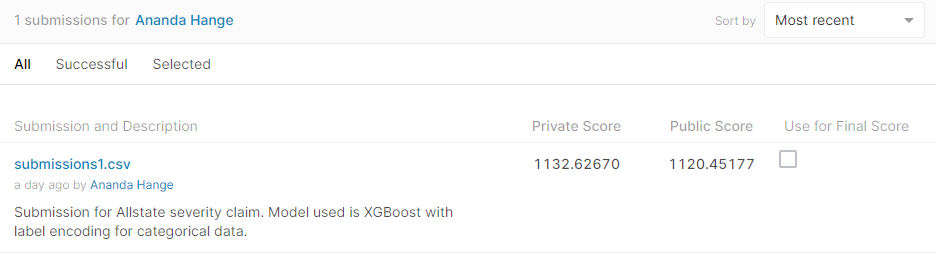

# **Stacking Model**

Now we will use stacking of model:

1. first split train set into X_train-X_test (80-20%)

2. choose any base model (tree based) 

3. hypreparameter tunnung of individual(if we have to use one type of model or different type of model) base models on X_train set.

4.Then split X_train into let's say D1 and D2 (50-50)%

5. Sample k-samples from D1 (d1,d2,d3....dk)

6. Train k-models on k-samples.i.e  model m1 will train on d1, m2 will train on d2 ,m3 will train on d3 and so on .let assume my m1,m2,m3 will be tunned decision tree .

7. Now on k-models predict D2.so we have k-predicted features set for meta model training.

8. Now for evaluation we use test set(X_test).We do base model prediction on X_test.So we wil get k-feature set.

9. Now will predict these k-feature set on meta model.

10.then we use MAE score on predicted and actual (y_test) set.

11.stack this result.

sudo code :

k : [5,10,20,30,50,80,100]  

n :[0.5,0.6,0.7,0.8,0.9,1]

k and n are hyperparameter

    for k number of model :         

        for n sampling ratio:             

            do steps 6,7,8,9,10,11

        end

    end





## **Now We will combine al these steps into single function.**

Updated Function

In [ ]:
'''def mae(y_true,y_pred):
  mae_score = mean_absolute_error(np.exp(y_pred)-shift , np.exp(y_true)-shift)
  return mae_score

def final_stack_prediction(meta_model_fit,X_test):
  return meta_model_fit.predict(X_test)

def meta_model_train(meta_model,predicton_set,y_2):
  meta_model_fit = meta_model.fit(predicton_set,y_2)
  return meta_model_fit


def prediction(base_model_list,X2):
  pred_set = []
  for model in base_model_list:
    pred = model.predict(X2).reshape(-1,1)
    pred_set.append(pred)
  return np.hstack(pred_set)

def gridsearch_cv(base_model,base_model_params_grid,X,y):
  grid_search = GridSearchCV(estimator = base_model , param_grid = base_model_params_grid, cv = 4,scoring='neg_mean_absolute_error',return_train_score=True,verbose = 3,refit =True,n_jobs =-1 )
  grid_search.fit(X,y)
  print(grid_search.best_params_,grid_search.best_score_)

  return grid_search.best_estimator_



def Ensemble_stacking1(X,y,X_test,y_test,sample_ratio,number_base_model,meta_model):
  
  #split X into X1 and X2 (50-50)%
  X_1,X_2,y_1,y_2 =  train_test_split(X,y,test_size = 0.5,random_state = 100)
  # we do k samping from X1 set.Where k = number of base models
  di =[]
  for i in range(number_base_model):
    d1 =  X_1.sample(frac=sample_ratio,replace=True).index
    di.append(d1)
  #fitting models on random samples(training models on X1 data points)
  mi_fit = []
  for i in range(number_base_model) :
    base_model =DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')
    base_model_params_grid = {
                                 'max_depth': [5,10,25,50,75],
                                 'min_samples_split': [5,10,15,25,50,100],
                                 'min_samples_leaf' : [5,10,25,50,75,100]
                                 }
    best_base_model = gridsearch_cv(base_model,base_model_params_grid,X_1.loc[di[i]],y_1[di[i]])
    print('training model : ',i+1)
    model_i = best_base_model.fit(X_1.loc[di[i]],y_1[di[i]])
   # print('sample {} for training are  : {}'.format(i+1,X_1.loc[di[i]]))
    
    mi_fit.append(model_i)                               #mi_fit contains fitted base models on X1
  #prediction on X2 set
  predicton_set = prediction(mi_fit,X_2)
  print(predicton_set.shape)
  #Training meta_model on predicted set(features)
  meta_model_fit = meta_model_train(meta_model,predicton_set,y_2)
  # For evaluation pass X_test (20%) to all models to get prediction set for meta_model
  prediction_set_test = prediction(mi_fit,X_test)
  print('shape of predicted set of features: ',prediction_set_test.shape)
  #last step predict the prediction set on meta_model
  final_prediction = final_stack_prediction(meta_model_fit,prediction_set_test)
  print('Predicted set on test set : ',prediction_set_test)

  mae_score = mae(y_test,final_prediction)

  print('MAE score after evaluation is',mae_score)

  return final_prediction

import time
start = time.time()

number_base_model = 5  #hyper parameter
sample_ratio = 0.9 #hyper parameter

meta_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=None, n_estimators=615,
              n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, verbosity=1)

y_pred = Ensemble_stacking1(X=X_train1,y=y_train,X_test = X_test1,y_test=y_test,
                           sample_ratio =sample_ratio,number_base_model=number_base_model,meta_model = meta_model)

end = time.time()
print((end - start)/60)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   54.7s


What if we have different different models as base models.

# **Stacking with different Models:**

Here let we have 3 different model. So we train 3 models on sampled data d1. And we will predict D2 set on these trained model.And last we take avg of 3 predicted values for each data point in D2 so finalliy we have single model.

from D1 we sample two set let d1,d2.

On d1 we train 3 different model [m1,m2,m3]

then we predict D2 on [m1,m2,m3] we get 3 values let say [x1,x2,x3] then we will avg them row wise. so we get [xavg1].

Same step we do for d2 sample as well.

So here we have number of model = 2 .

final feature set we get [xavg1 xavg2].

## **1. XGBoost as base model**

Here we going to use single Xgboost model to train on samples.

In [ ]:
def mae(y_true,y_pred):
  mae_score = mean_absolute_error(np.exp(y_pred)-shift , np.exp(y_true)-shift)
  return mae_score

def final_stack_prediction(meta_model_fit,X_test):
  return meta_model_fit.predict(X_test)

def meta_model_train(meta_model,predicton_set,y_2):
  meta_model_fit = meta_model.fit(predicton_set,y_2)
  return meta_model_fit


def prediction(base_model_list,X2):
  pred_set = []
  for model in base_model_list:
    pred = model.predict(X2).reshape(-1,1)
    pred_set.append(pred)
  return np.hstack(pred_set)



def Ensemble_stacking1(X,y,X_test,y_test,sample_ratio,number_base_model,meta_model):
  
  #split X into X1 and X2 (50-50)%
  X_1,X_2,y_1,y_2 =  train_test_split(X,y,test_size = 0.5,random_state = 100)
  # we do k samping from X1 set.Where k = number of base models
  di =[]
  for i in range(number_base_model):
    d1 =  X_1.sample(frac=sample_ratio,replace=True).index
    di.append(d1)
  #fitting models on random samples(training models on X1 data points)
  mi_fit = []
  for i in range(number_base_model) :
    print('training model : ',i+1)
    base_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.05, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=1500,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=10,
              reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1)
    
    model_i = base_model.fit(X_1.loc[di[i]],y_1[di[i]])
   # print('sample {} for training are  : {}'.format(i+1,X_1.loc[di[i]]))
    mi_fit.append(model_i)                               #mi_fit contains fitted base models on X1
  #prediction on X2 set
  predicton_set = prediction(mi_fit,X_2)
  print(predicton_set.shape)
  #Training meta_model on predicted set(features)
  meta_model_fit = meta_model_train(meta_model,predicton_set,y_2)
  # For evaluation pass X_test (20%) to all models to get prediction set for meta_model
  prediction_set_test = prediction(mi_fit,X_test)
  print('shape of predicted set of features: ',prediction_set_test.shape)
  #last step predict the prediction set on meta_model
  final_prediction = final_stack_prediction(meta_model_fit,prediction_set_test)
  #print('Predicted set on test set : ',prediction_set_test)

  mae_score = mae(y_test,final_prediction)

  print('MAE score after evaluation is',mae_score)

  return final_prediction,mae_score 


number_base_model = [1,5,10,15,20,30,40]  #hyper parameter
sample_ratio = [0.5,0.7,0.8,0.9,1] #hyper parameter
score = []
meta_model = XGBRegressor(objective='reg:squarederror',tree_method='gpu_hist',
              prdictor='gpu_predictor')

for i in number_base_model:
  for j in sample_ratio:
    print('number of base model: ',i)
    print('sample ratio : ',j)
    y_pred,mae_score = Ensemble_stacking1(X=X_train1,y=y_train,X_test = X_test1,y_test=y_test,
                           sample_ratio =j,number_base_model=i,meta_model = meta_model)
    score.append(mae_score)
print(score)

number of base model:  1
sample ratio :  0.5
training model :  1
(75327, 1)
shape of predicted set of features:  (37664, 1)
MAE score after evaluation is 1173.9303742898635
number of base model:  1
sample ratio :  0.7
training model :  1
(75327, 1)
shape of predicted set of features:  (37664, 1)
MAE score after evaluation is 1165.519689472299
number of base model:  1
sample ratio :  0.8
training model :  1
(75327, 1)
shape of predicted set of features:  (37664, 1)
MAE score after evaluation is 1165.1770169102388
number of base model:  1
sample ratio :  0.9
training model :  1
(75327, 1)
shape of predicted set of features:  (37664, 1)
MAE score after evaluation is 1164.76492761364
number of base model:  1
sample ratio :  1
training model :  1
(75327, 1)
shape of predicted set of features:  (37664, 1)
MAE score after evaluation is 1167.118275394229
number of base model:  5
sample ratio :  0.5
training model :  1
training model :  2
training model :  3
training model :  4
training model :

In [ ]:
def mae(y_true,y_pred):
  mae_score = mean_absolute_error(np.exp(y_pred)-shift , np.exp(y_true)-shift)
  return mae_score

def final_stack_prediction(meta_model_fit,X_test):
  return meta_model_fit.predict(X_test)

def meta_model_train(meta_model,predicton_set,y_2):
  meta_model_fit = meta_model.fit(predicton_set,y_2)
  return meta_model_fit


def prediction(base_model_list,X2):
  pred_set = []
  for model in base_model_list:
    pred = model.predict(X2).reshape(-1,1)
    pred_set.append(pred)
  return np.hstack(pred_set)



def Ensemble_stacking1(X,y,X_test,y_test,sample_ratio,number_base_model,meta_model):
  
  #split X into X1 and X2 (50-50)%
  X_1,X_2,y_1,y_2 =  train_test_split(X,y,test_size = 0.5,random_state = 100)
  # we do k samping from X1 set.Where k = number of base models
  di =[]
  for i in range(number_base_model):
    d1 =  X_1.sample(frac=sample_ratio,replace=True).index
    di.append(d1)
  #fitting models on random samples(training models on X1 data points)
  mi_fit = []
  for i in range(number_base_model) :
    print('training model : ',i+1)
    base_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.05, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=1500,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=10,
              reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1)
    
    model_i = base_model.fit(X_1.loc[di[i]],y_1[di[i]])
   # print('sample {} for training are  : {}'.format(i+1,X_1.loc[di[i]]))
    mi_fit.append(model_i)                               #mi_fit contains fitted base models on X1
  #prediction on X2 set
  predicton_set = prediction(mi_fit,X_2)
  print(predicton_set.shape)
  #Training meta_model on predicted set(features)
  meta_model_fit = meta_model_train(meta_model,predicton_set,y_2)
  # meta_model_fit have trained meta model.Which will use to predict X_test data
  # For evaluation pass X_test (20%) to all models to get prediction set for meta_model
  prediction_set_test = prediction(mi_fit,X_test)
  print('shape of predicted set of features: ',prediction_set_test.shape)
  #last step predict the prediction set on meta_model
  final_prediction = final_stack_prediction(meta_model_fit,prediction_set_test)
  #print('Predicted set on test set : ',prediction_set_test)

  mae_score = mae(y_test,final_prediction)

  print('MAE score after evaluation is',mae_score)

  return final_prediction,mae_score ,mi_fit,meta_model_fit 


number_base_model = 7  #hyper parameter
sample_ratio = 1 #hyper parameter
#score = []
meta_model = XGBRegressor(objective='reg:squarederror',tree_method='gpu_hist',
              prdictor='gpu_predictor')


y_pred,mae_score,base_model_list,trained_meta_model = Ensemble_stacking1(X=X_train1,y=y_train,X_test = X_test1,y_test=y_test,
                           sample_ratio =sample_ratio,number_base_model=number_base_model,
                           meta_model = meta_model)



training model :  1
training model :  2
training model :  3
training model :  4
training model :  5
training model :  6
training model :  7
(75327, 7)
shape of predicted set of features:  (37664, 7)
MAE score after evaluation is 1151.3188022032732


In [ ]:
def prediction(base_model_list,X2):
  pred_set = []
  for model in base_model_list:
    pred = model.predict(X2).reshape(-1,1)
    pred_set.append(pred)
  return np.hstack(pred_set)

def final_stack_prediction(meta_model_fit,X_test):
  return meta_model_fit.predict(X_test)

def Ensemble_test(X_test,base_model_list,meta_model):
  test_base_model_prediction = prediction(base_model_list,X_test)
  print(test_base_model_prediction.shape)
  final_prediction = final_stack_prediction(meta_model,test_base_model_prediction)

  return final_prediction

prediction_test_set = Ensemble_test(X_test_lb_encoded,base_model_list,trained_meta_model)

prediction_test_set = np.exp(prediction_test_set)-200


print(prediction_test_set )

sub = pd.read_csv('/content/sample_submission.csv')
print(sub.shape)

sub['loss'] = prediction_test_set 

sub.to_csv('submissions_ensemble_XGB_base_model_1.csv', index=False)

(125546, 7)
[1368.413  1948.8027 9219.906  ... 2720.605  1007.9807 3135.8572]
(125546, 2)


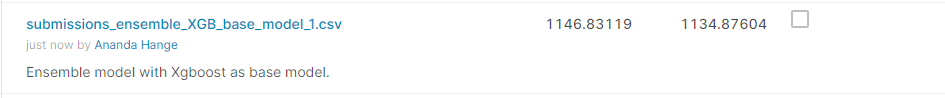

If we use Xgboost as base model as well as meta model then we get MAE score :1148

## **2. Disicion tree as Base model:**

In [ ]:
def mae(y_true,y_pred):
  mae_score = mean_absolute_error(np.exp(y_pred)-shift , np.exp(y_true)-shift)
  return mae_score

def final_stack_prediction(meta_model_fit,X_test):
  return meta_model_fit.predict(X_test)

def meta_model_train(meta_model,predicton_set,y_2):
  meta_model_fit = meta_model.fit(predicton_set,y_2)
  return meta_model_fit


def prediction(base_model_list,X2):
  pred_set = []
  for model in base_model_list:
    pred = model.predict(X2).reshape(-1,1)
    pred_set.append(pred)
  return np.hstack(pred_set)



def Ensemble_stacking1(X,y,X_test,y_test,sample_ratio,number_base_model,meta_model):
  
  #split X into X1 and X2 (50-50)%
  X_1,X_2,y_1,y_2 =  train_test_split(X,y,test_size = 0.5,random_state = 100)
  # we do k samping from X1 set.Where k = number of base models
  di =[]
  for i in range(number_base_model):
    d1 =  X_1.sample(frac=sample_ratio,replace=True).index
    di.append(d1)
  #fitting models on random samples(training models on X1 data points)
  mi_fit = []
  for i in range(number_base_model) :
    base_model =DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')
    print('Training base model : ',i+1)
    model_i = base_model.fit(X_1.loc[di[i]],y_1[di[i]])
   # print('sample {} for training are  : {}'.format(i+1,X_1.loc[di[i]]))
    mi_fit.append(model_i)                               #mi_fit contains fitted base models on X1
  #prediction on X2 set
  predicton_set = prediction(mi_fit,X_2)
  #print(predicton_set.shape)
  #Training meta_model on predicted set(features)
  print('Training meta model.........')
  meta_model_fit = meta_model_train(meta_model,predicton_set,y_2)
  # For evaluation pass X_test (20%) to all models to get prediction set for meta_model
  prediction_set_test = prediction(mi_fit,X_test)
  #print('shape of predicted set of features: ',prediction_set_test.shape)
  #last step predict the prediction set on meta_model
  final_prediction = final_stack_prediction(meta_model_fit,prediction_set_test)
  #print('Predicted set on test set : ',prediction_set_test)

  mae_score = mae(y_test,final_prediction)

  print('MAE score after evaluation is',mae_score)

  return final_prediction,mae_score 


#number_base_model = 50  #hyper parameter
#sample_ratio = 0.9 #hyper parameter

meta_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              importance_type='gain', learning_rate=0.05, max_delta_step=0,
              max_depth=5, min_child_weight=3, missing=None, n_estimators=1500,
              n_jobs=1, nthread=None, objective='reg:squarederror',random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, verbosity=1)

number_base_model = [5,10,20,40,60,80,100]
sample_ratio = [0.5,0.7,0.8,0.9,1]

score = []
for i in number_base_model:
  for j in sample_ratio:
    print('number of base model: ',i)
    print('sample ratio : ',j)
    y_pred,mae_score = Ensemble_stacking1(X=X_train1,y=y_train,X_test = X_test1,y_test=y_test,
                           sample_ratio =j,number_base_model=i,meta_model = meta_model)
    score.append(mae_score)
print(score)

number of base model:  5
sample ratio :  0.5
Training base model :  1
Training base model :  2
Training base model :  3
Training base model :  4
Training base model :  5
Training meta model.........
MAE score after evaluation is 1265.6152702229124
number of base model:  5
sample ratio :  0.7
Training base model :  1
Training base model :  2
Training base model :  3
Training base model :  4
Training base model :  5
Training meta model.........
MAE score after evaluation is 1267.5082548337562
number of base model:  5
sample ratio :  0.8
Training base model :  1
Training base model :  2
Training base model :  3
Training base model :  4
Training base model :  5
Training meta model.........
MAE score after evaluation is 1266.6408619206377
number of base model:  5
sample ratio :  0.9
Training base model :  1
Training base model :  2
Training base model :  3
Training base model :  4
Training base model :  5
Training meta model.........
MAE score after evaluation is 1268.7794497514724
number o

If we use Decision tree regressor model asbase model then we get MAE:1218 for number of model =100 and sample ratio= 0.8

In [ ]:
def mae(y_true,y_pred):
  mae_score = mean_absolute_error(np.exp(y_pred)-shift , np.exp(y_true)-shift)
  return mae_score

def final_stack_prediction(meta_model_fit,X_test):
  return meta_model_fit.predict(X_test)

def meta_model_train(meta_model,predicton_set,y_2):
  meta_model_fit = meta_model.fit(predicton_set,y_2)
  return meta_model_fit


def prediction(base_model_list,X2):
  pred_set = []
  for model in base_model_list:
    pred = model.predict(X2).reshape(-1,1)
    pred_set.append(pred)
  return np.hstack(pred_set)



def Ensemble_stacking1(X,y,X_test,y_test,sample_ratio,number_base_model,meta_model):
  
  #split X into X1 and X2 (50-50)%
  X_1,X_2,y_1,y_2 =  train_test_split(X,y,test_size = 0.5,random_state = 100)
  # we do k samping from X1 set.Where k = number of base models
  di =[]
  for i in range(number_base_model):
    d1 =  X_1.sample(frac=sample_ratio,replace=True).index
    di.append(d1)
  #fitting models on random samples(training models on X1 data points)
  mi_fit = []
  for i in range(number_base_model) :
    base_model =DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')
    print('Training base model : ',i+1)
    model_i = base_model.fit(X_1.loc[di[i]],y_1[di[i]])
   # print('sample {} for training are  : {}'.format(i+1,X_1.loc[di[i]]))
    mi_fit.append(model_i)                               #mi_fit contains fitted base models on X1
  #prediction on X2 set
  predicton_set = prediction(mi_fit,X_2)
  #print(predicton_set.shape)
  #Training meta_model on predicted set(features)
  print('Training meta model.........')
  meta_model_fit = meta_model_train(meta_model,predicton_set,y_2)
  # For evaluation pass X_test (20%) to all models to get prediction set for meta_model
  prediction_set_test = prediction(mi_fit,X_test)
  #print('shape of predicted set of features: ',prediction_set_test.shape)
  #last step predict the prediction set on meta_model
  final_prediction = final_stack_prediction(meta_model_fit,prediction_set_test)
  #print('Predicted set on test set : ',prediction_set_test)

  mae_score = mae(y_test,final_prediction)

  print('MAE score after evaluation is',mae_score)

  return final_prediction,mae_score,mi_fit,meta_model_fit




meta_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,tree_method='gpu_hist',
              importance_type='gain', learning_rate=0.05, max_delta_step=0,
              max_depth=5, min_child_weight=3, missing=None, n_estimators=1500,
              n_jobs=1, nthread=None, objective='reg:squarederror',random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, verbosity=1)

number_base_model = 100
sample_ratio = 0.8


y_pred,mae_score,trained_base_model_list,trained_meta_model= Ensemble_stacking1(X=X_train1,y=y_train,X_test = X_test1,y_test=y_test,
                           sample_ratio = sample_ratio,number_base_model=number_base_model,meta_model = meta_model)


Training base model :  1
Training base model :  2
Training base model :  3
Training base model :  4
Training base model :  5
Training base model :  6
Training base model :  7
Training base model :  8
Training base model :  9
Training base model :  10
Training base model :  11
Training base model :  12
Training base model :  13
Training base model :  14
Training base model :  15
Training base model :  16
Training base model :  17
Training base model :  18
Training base model :  19
Training base model :  20
Training base model :  21
Training base model :  22
Training base model :  23
Training base model :  24
Training base model :  25
Training base model :  26
Training base model :  27
Training base model :  28
Training base model :  29
Training base model :  30
Training base model :  31
Training base model :  32
Training base model :  33
Training base model :  34
Training base model :  35
Training base model :  36
Training base model :  37
Training base model :  38
Training base model :

In [42]:
def prediction(base_model_list,X2):
  pred_set = []
  for model in base_model_list:
    pred = model.predict(X2).reshape(-1,1)
    pred_set.append(pred)
  return np.hstack(pred_set)

def final_stack_prediction(meta_model_fit,X_test):
  return meta_model_fit.predict(X_test)

def Ensemble_test(X_test,base_model_list,meta_model):
  test_base_model_prediction = prediction(base_model_list,X_test)
  print(test_base_model_prediction.shape)
  final_prediction = final_stack_prediction(meta_model,test_base_model_prediction)

  return final_prediction

prediction_test_set = Ensemble_test(X_test_lb_encoded,trained_base_model_list,trained_meta_model)

prediction_test_set = np.exp(prediction_test_set)-200


print(prediction_test_set )

sub = pd.read_csv('/content/sample_submission.csv')
print(sub.shape)

sub['loss'] = prediction_test_set 

sub.to_csv('submissions_ensemble_DT_base_model_1.csv', index=False)

(125546, 100)
[1743.4895 2215.1494 8089.2646 ... 2580.1633 1035.3112 3435.582 ]
(125546, 2)


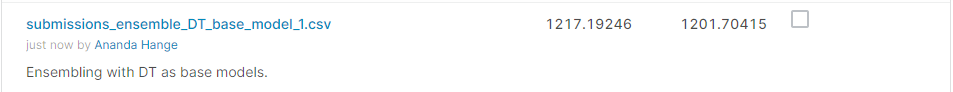

## **3. Different model as base model**

In [ ]:
def mae(y_true,y_pred):
  mae_score = mean_absolute_error(np.exp(y_pred)-shift , np.exp(y_true)-shift)
  return mae_score

def final_stack_prediction(meta_model_fit,X_test):
  return meta_model_fit.predict(X_test)

def meta_model_train(meta_model,predicton_set,y_2):
  meta_model_fit = meta_model.fit(predicton_set,y_2)
  return meta_model_fit

def prediction(diff_models,X):
  final_pred_set = []
  #here we have diff_models = [[m11,m21,m31],[m12,m22,m32],....[m1i,m2i,m3i]]
  #for each base learner (number of models)
  for models in diff_models:
    pred_set = []
    for model in models:
      #here we predict X2 on each of different models 
      pred = model.predict(X).reshape(-1,1)
      pred_set.append(pred)

    #we will take avg of predicted labels row wise.
    mean = np.mean(np.hstack(pred_set),axis = 1).reshape(-1,1)
    final_pred_set.append(mean)
  return np.hstack(final_pred_set)

def base_model_training(X,y):
  diff_models =[]
  #define different base models which we will take averege and make them single ,So we have k models single models
  dt = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')
  #ad =  AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
  #                 n_estimators=50, random_state=None)
  xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.03, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=1500,objective='reg:squarederror',
              prdictor='gpu_predictor',n_jobs=1, nthread=None, tree_method='gpu_hist',
              random_state=0, reg_alpha=10,reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, verbosity=1)
  diff_base_model = [dt,xgb]

  for model in diff_base_model:
    #for each model we will train on sampled ith data. here we have different models such as [m1,m2,m3]
    model_i = model.fit(X,y)
    diff_models.append(model_i)
  #so we will get trained models [m1i,m2i,m3i] .Where i is ith sample.
  return diff_models #we return list of trained models  [m1i,m2i,m3i]

def Ensemble_stacking_different_base_models(X,y,X_test,y_test,sample_ratio,number_base_model,meta_model):
  
  #split X into X1 and X2 (50-50)%
  X_1,X_2,y_1,y_2 =  train_test_split(X,y,test_size = 0.5,random_state = 100)
  # we do k samping from X1 set.Where k = number of base models
  di =[]
  for i in range(number_base_model):
    d1 =  X_1.sample(frac=sample_ratio,replace=True).index
    di.append(d1)
  #fitting models on random samples(training models on X1 data points)
  mi_fit = []
  for i in range(number_base_model) :
    #for each ith sample we will train different base models let different models are [m1,m2,m3]
    print('training base model : ',i+1)
    model_i = base_model_training(X_1.loc[di[i]],y_1[di[i]])
    #base_model_training() function gives list of different models trained on ith sample --> [m1i,m2i,m3i]
    #here we append list of trained base models for each ith sample
    mi_fit.append(model_i) #mi_fit contains [[m11,m21,m31],[m12,m22,m32],....[m1i,m2i,m3i]] where i is number of models(# of samples)
  #prediction on X2 set
  predicton_set = prediction(mi_fit,X_2)
  #print(predicton_set.shape)
  #Training meta_model on predicted set(features)
  meta_model_fit = meta_model_train(meta_model,predicton_set,y_2)
  # For evaluation pass X_test (20%) to all models to get prediction set for meta_model
  prediction_set_test = prediction(mi_fit,X_test)
  #print('shape of predicted set of features: ',prediction_set_test.shape)
  #last step predict the prediction set on meta_model
  final_prediction = final_stack_prediction(meta_model_fit,prediction_set_test)
  #print('Predicted set on test set : ',prediction_set_test )

  mae_score = mae(y_test,final_prediction)

  print('MAE score after evaluation is',mae_score)

  return final_prediction,mae_score


number_base_model = [15,30,40]  #hyper parameter
sample_ratio = [0.5,0.7,0.8,0.9,1] #hyper parameter
score = []
meta_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,tree_method='gpu_hist',
              importance_type='gain', learning_rate=0.05, max_delta_step=0,
              max_depth=5, min_child_weight=3, missing=None, n_estimators=1500,
              n_jobs=1, nthread=None, objective='reg:squarederror',random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, verbosity=1)

for i in number_base_model:
  for j in sample_ratio:
    print('number of base model: ',i)
    print('sample ratio : ',j)
    y_pred,mae_score =Ensemble_stacking_different_base_models(X=X_train1,y=y_train,X_test = X_test1,y_test=y_test,
                           sample_ratio =j,number_base_model=i,meta_model = meta_model)
    score.append(mae_score)
print(score)

number of base model:  15
sample ratio :  0.5
training base model :  1
training base model :  2
training base model :  3
training base model :  4
training base model :  5
training base model :  6
training base model :  7
training base model :  8
training base model :  9
training base model :  10
training base model :  11
training base model :  12
training base model :  13
training base model :  14
training base model :  15
MAE score after evaluation is 1178.6729563262086
number of base model:  15
sample ratio :  0.7
training base model :  1
training base model :  2
training base model :  3
training base model :  4
training base model :  5
training base model :  6
training base model :  7
training base model :  8
training base model :  9
training base model :  10
training base model :  11
training base model :  12
training base model :  13
training base model :  14
training base model :  15
MAE score after evaluation is 1175.5023100295668
number of base model:  15
sample ratio :  0.8
tr

If we use different model(Decision tree and Xgboost) as single base model then we get MAE: 1175  for number of model =15 and sample ratio=0.9

In [ ]:
def mae(y_true,y_pred):
  mae_score = mean_absolute_error(np.exp(y_pred)-shift , np.exp(y_true)-shift)
  return mae_score

def meta_model_train(meta_model,predicton_set,y_2):
  meta_model_fit = meta_model.fit(predicton_set,y_2)
  return meta_model_fit

def final_stack_prediction(meta_model_fit,X_test):
  return meta_model_fit.predict(X_test)

def prediction(diff_models,X):
  final_pred_set = []
  #here we have diff_models = [[m11,m21,m31],[m12,m22,m32],....[m1i,m2i,m3i]]
  #for each base learner (number of models)
  for models in diff_models:
    pred_set = []
    for model in models:
      #here we predict X2 on each of different models 
      pred = model.predict(X).reshape(-1,1)
      pred_set.append(pred)

    #we will take avg of predicted labels row wise.
    mean = np.mean(np.hstack(pred_set),axis = 1).reshape(-1,1)
    final_pred_set.append(mean)
  return np.hstack(final_pred_set)

def base_model_training(X,y):
  diff_models =[]
  #define different base models which we will take averege and make them single ,So we have k models single models
  dt1 = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')
  
  #ad = AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
   #                n_estimators=50, random_state=None)
  
  xgb =   XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.05, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=1500,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=10,
              reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1)
  
  rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=70, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)
  
  diff_base_model = [dt1,xgb,rf]

  for model in diff_base_model:
    #for each model we will train on sampled ith data. here we have different models such as [m1,m2,m3]
    model_i = model.fit(X,y)
    diff_models.append(model_i)
  #so we will get trained models [m1i,m2i,m3i] .Where i is ith sample.
  return diff_models #we return list of trained models  [m1i,m2i,m3i]

def Ensemble_stacking_different_base_models(X,y,X_test,y_test,sample_ratio,number_base_model,meta_model):
  
  #split X into X1 and X2 (50-50)%
  X_1,X_2,y_1,y_2 =  train_test_split(X,y,test_size = 0.5,random_state = 100)
  # we do k samping from X1 set.Where k = number of base models
  di =[]
  for i in range(number_base_model):
    d1 =  X_1.sample(frac=sample_ratio,replace=True).index
    di.append(d1)
  #fitting models on random samples(training models on X1 data points)
  mi_fit = []
  for i in range(number_base_model) :
    #for each ith sample we will train different base models let different models are [m1,m2,m3]
    print('Training model : ',i+1)
    model_i = base_model_training(X_1.loc[di[i]],y_1[di[i]])
    #base_model_training() function gives list of different models trained on ith sample --> [m1i,m2i,m3i]
    #here we append list of trained base models for each ith sample
    mi_fit.append(model_i) #mi_fit contains [[m11,m21,m31],[m12,m22,m32],....[m1i,m2i,m3i]] where i is number of models(# of samples)
  #prediction on X2 set
  print(len(mi_fit),mi_fit[0])
  predicton_set = prediction(mi_fit,X_2)
  print(predicton_set.shape)
  #Training meta_model on predicted set(features)
  meta_model_fit = meta_model_train(meta_model,predicton_set,y_2)
  # For evaluation pass X_test (20%) to all models to get prediction set for meta_model
  prediction_set_test = prediction(mi_fit,X_test)
  print('shape of predicted set of features: ',prediction_set_test.shape)
  #last step predict the prediction set on meta_model
  final_prediction = final_stack_prediction(meta_model_fit,prediction_set_test)
  print('Predicted set on test set : ',prediction_set_test )

  mae_score = mae(y_test,final_prediction)

  print('MAE score after evaluation is',mae_score)

  return final_prediction

import time
start = time.time()
"the code you want to test stays here"

number_base_model = 4   #hyper parameter
sample_ratio = 0.85  #hyper parameter

meta_model = XGBRegressor(tree_method='gpu_hist',prdictor='gpu_predictor')
y_pred =  Ensemble_stacking_different_base_models(X=X_train1,y=y_train,X_test = X_test1,y_test=y_test,
                           sample_ratio=sample_ratio,number_base_model=number_base_model,meta_model=meta_model)

end = time.time()

print('time taken is : {} min'.format((end - start)/60))

Training model :  1
Training model :  2
Training model :  3
Training model :  4
4 [DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=15,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=25,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=5, splitter='best'), XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, min_child_weight=5, missing=None, n_estimators=1500,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             prdictor='gpu_predictor', random_state=0, reg_alpha=10,
             reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
             subsampl

If we use Different model (dt,Xgb,Adaboost,random forest)as single base model then we get MAE around 1186.

Here problem is if we go more than 5 as base models and if we use xgboost and RF asbase model my colab notebook were crashed.

In [ ]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 

print('\t\t\tComparitive model study')
myTable = PrettyTable(['Model', "Score"]) 
  
# Add rows 
myTable.add_row(["Lasso Regrssion", "1310"]) 
myTable.add_row(["Ridge Regression", "1310"]) 
myTable.add_row(["Linear Regression", "1311"]) 
myTable.add_row(["Decision Tree", "1282"]) 
myTable.add_row(["Random Forest", "1210"]) 
myTable.add_row(["Adaboost", "1439"]) 
myTable.add_row(["Xgboost", "1133"])
myTable.add_row(["Stacking with Xgboost As base model", "1148"])
myTable.add_row(["Stacking with Decision tree As base model", "1218"])
myTable.add_row(["Stacking with (dt + Xgboosst) as  base model", "1175"])
myTable.add_row(["Stacking with (dt + Xgboosst+RF) as  base model", "1186"])

  
print(myTable)

			Comparitive model study
+-------------------------------------------------+-------+
|                      Model                      | Score |
+-------------------------------------------------+-------+
|                 Lasso Regrssion                 |  1310 |
|                 Ridge Regression                |  1310 |
|                Linear Regression                |  1311 |
|                  Decision Tree                  |  1282 |
|                  Random Forest                  |  1210 |
|                     Adaboost                    |  1439 |
|                     Xgboost                     |  1133 |
|       Stacking with Xgboost As base model       |  1148 |
|    Stacking with Decision tree As base model    |  1218 |
|   Stacking with (dt + Xgboosst) as  base model  |  1175 |
| Stacking with (dt + Xgboosst+RF) as  base model |  1186 |
+-------------------------------------------------+-------+


We can see Xgboost model works better.Gives MAE 1133

# **Stacking Method**

Here we are doing another stacking method called as out of bag prediction method.


Reference : 
1. https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/

2. https://www.kaggle.com/c/allstate-claims-severity/discussion/25743

3. https://www.kaggle.com/abhilashawasthi/stacking-starter

Steps :

1. We want to predict train and test sets with some 1-st level model(s), and then use this predictions as features for 2-nd level model.
2. Any model can be used as 1-st level model or 2-nd level model.
3. To avoid overfitting (for train set) we use cross-validation technique and in each fold we predict out-of-fold part of train set.
4. The common practice is to use from 3 to 10 folds.
5. In each fold we predict full test set, so after completion of all folds we need to find mean (mode) of all test set predictions made in each fold.
6. As an example we look at stacking implemented with single 1-st level model and 5-fold cross-validation.

In [ ]:
def mae(y_true,y_pred):
  mae_score = mean_absolute_error(np.exp(y_pred)-shift , np.exp(y_true)-shift)
  return mae_score

def get_oof_prediction(clf):
  oof_train = np.zeros((X_train1.shape[0],))
  oof_test = []
  model = []
  fold = 0
  for trn_ind , val_ind in skf.split(X_train1,y_train):
    x_tr, x_val =  X_train1.iloc[trn_ind], X_train1.iloc[val_ind]
    y_tr = y_train.iloc[trn_ind]
    fold = fold + 1 
    print('fold : ', fold)
    #training model on train data
    model_train = clf.fit(x_tr, y_tr)
    # predictions on CV data (out of bag)
    oof_train[val_ind] = model_train.predict(x_val)
    #appending predicted cv data on each fold
    oof_test.append(model_train.predict(X_test1).reshape(-1,1))
    #appeding n_fold trained model
    model.append(model_train)

  #taking mean along row wise to make single feature
  test_mean_pred = np.mean(np.hstack(oof_test),axis = 1).reshape(-1,1)
  return oof_train.reshape(-1,1),test_mean_pred.reshape(-1,1),model





#Defining Base models

dt = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')
xg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.05, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=1500,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=10,
              reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1)

rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

# defining CV folds
N_fold = 5
skf = KFold(N_fold , shuffle = True, random_state=123)

print('Training dt .......')
oof_train_dt,test_mean_pred_dt,model_dt = get_oof_prediction(dt)
print('Training Xgb .......')
oof_train_xg,test_mean_pred_xg,model_xg = get_oof_prediction(xg)
print('Training rf .......')
oof_train_rf,test_mean_pred_rf,model_rf = get_oof_prediction(rf)

print("XG-CV: {}".format(mae(y_train,oof_train_xg)))
print("DT-CV: {}".format(mae(y_train,oof_train_dt)))
print("RF-CV: {}".format(mae(y_train,oof_train_rf)))

# Concanating predicted feature set
x_train_pred = np.concatenate((oof_train_dt, oof_train_xg,oof_train_rf), axis=1)
x_test_pred = np.concatenate((test_mean_pred_dt, test_mean_pred_xg,test_mean_pred_rf), axis=1)

#Defining meta model:
meta_model = XGBRegressor(tree_method='gpu_hist',prdictor='gpu_predictor')
meta_model.fit(x_train_pred,y_train)
#prediction of X_test on trained meta model
prediction_test = meta_model.predict(x_test_pred)
#calculation MAE score as evalution 
mae_score= mae(y_test,prediction_test)
print('MAE score : ',mae_score)

Training dt .......
fold :  1
fold :  2
fold :  3
fold :  4
fold :  5
Training Xgb .......
fold :  1
fold :  2
fold :  3
fold :  4
fold :  5
Training rf .......
fold :  1
fold :  2
fold :  3
fold :  4
fold :  5
XG-CV: 1142.6432178807927
DT-CV: 1298.8077382626352
RF-CV: 1212.7497398409116
[12:33:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE score :  1137.1856869236533


## **Getting prediction on test data.**

In [ ]:
base_model_dict = {
    'Decision tree': model_dt,
    'Xgboost' : model_xg,
    'Random forest' : model_rf
}

test_mean_pred = []
for i in base_model_dict.values():
  test_pred = []
  for model in i:
     test_pred.append(model.predict(X_test_lb_encoded).reshape(-1,1))
  test_mean_pred.append(np.mean(np.hstack(test_pred),axis = 1).reshape(-1,1))
  
test_mean_pred = np.hstack(test_mean_pred)
test_mean_pred.shape

(125546, 3)

In [ ]:
prediction_test = meta_model.predict(test_mean_pred)
prediction_test = np.exp(prediction_test)-200

print(prediction_test)

sub = pd.read_csv('/content/sample_submission.csv')
print(sub.shape)

sub['loss'] = prediction_test

sub.to_csv('submissions_oob_stack_dt_rf_xgb_1.csv', index=False)

[1460.7693  2027.1064  9259.336   ... 2726.1223   923.49805 3289.1602 ]
(125546, 2)


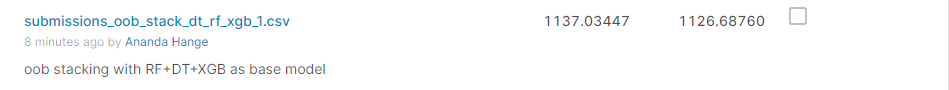

### Now we add Extratree regression model as base model :

In [ ]:
def mae(y_true,y_pred):
  mae_score = mean_absolute_error(np.exp(y_pred)-shift , np.exp(y_true)-shift)
  return mae_score
def get_oof_prediction(clf):
  oof_train = np.zeros((X_train1.shape[0],))
  oof_test = []
  fold = 0
  model = []
  for trn_ind , val_ind in skf.split(X_train1,y_train):
    fold = fold+1
    print('fold : ',fold)
    x_tr, x_val =  X_train1.iloc[trn_ind], X_train1.iloc[val_ind]
    y_tr = y_train.iloc[trn_ind]

    train_model = clf.fit(x_tr, y_tr)
    oof_train[val_ind] = train_model.predict(x_val)
    oof_test.append(train_model.predict(X_test1).reshape(-1,1))
    model.append(train_model)
  test_mean_pred = np.mean(np.hstack(oof_test),axis = 1).reshape(-1,1)
  return oof_train.reshape(-1,1),test_mean_pred.reshape(-1,1),model

dt = DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')
xg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.9,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0,
              importance_type='gain', learning_rate=0.055, max_delta_step=0,
              max_depth=5, min_child_weight=5, missing=None, n_estimators=1500,
              n_jobs=1, nthread=None, objective='reg:squarederror',
              prdictor='gpu_predictor', random_state=0, reg_alpha=10,
              reg_lambda=0, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.9, tree_method='gpu_hist', verbosity=1)

rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=25, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

et = ExtraTreesRegressor(n_estimators=100,max_depth=20,min_samples_leaf=2,n_jobs=-1)

skf = KFold(5, shuffle = True, random_state=123)

print('training dt........')
oof_train_dt,test_mean_pred_dt,model_dt = get_oof_prediction(dt)
print('training Xgb........')
oof_train_xg,test_mean_pred_xg,model_xg = get_oof_prediction(xg)
print('training rf........')
oof_train_rf,test_mean_pred_rf,model_rf = get_oof_prediction(rf)
print('training et........')
oof_train_et,test_mean_pred_et,model_et = get_oof_prediction(et)

print("XG-CV: {}".format(mae(y_train,oof_train_xg)))
print("DT-CV: {}".format(mae(y_train,oof_train_dt)))
print("RF-CV: {}".format(mae(y_train,oof_train_rf)))
print("ET-CV: {}".format(mae(y_train,oof_train_et)))



x_train_pred = np.concatenate((oof_train_dt, oof_train_xg,oof_train_rf,oof_train_et), axis=1)
x_test_pred = np.concatenate((test_mean_pred_dt, test_mean_pred_xg,test_mean_pred_rf,test_mean_pred_et), axis=1)

meta_model = XGBRegressor(tree_method='gpu_hist',prdictor='gpu_predictor')
meta_model.fit(x_train_pred,y_train)
prediction_test = meta_model.predict(x_test_pred)

mae_score= mae(prediction_test,y_test)
print('Test MAE score after evaluation : ',mae_score)

training dt........
fold :  1
fold :  2
fold :  3
fold :  4
fold :  5
training Xgb........
fold :  1
fold :  2
fold :  3
fold :  4
fold :  5
training rf........
fold :  1
fold :  2
fold :  3
fold :  4
fold :  5
training et........
fold :  1
fold :  2
fold :  3
fold :  4
fold :  5
XG-CV: 1142.673432255808
DT-CV: 1298.8077382626352
RF-CV: 1212.6493743339108
ET-CV: 1208.0611243760009
[13:14:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test MAE score after evaluation :  1137.9280158842307


In [ ]:
base_model_dict = {
    'Decision tree': model_dt,
    'Xgboost' : model_xg,
    'Random forest' : model_rf,
    'Extra tree' : model_et
}

test_mean_pred = []
for i in base_model_dict.values():
  test_pred = []
  for model in i:
     test_pred.append(model.predict(X_test_lb_encoded).reshape(-1,1))
  test_mean_pred.append(np.mean(np.hstack(test_pred),axis = 1).reshape(-1,1))
  
test_mean_pred = np.hstack(test_mean_pred)
test_mean_pred.shape

(125546, 4)

In [ ]:
prediction_test = meta_model.predict(test_mean_pred)
prediction_test = np.exp(prediction_test)-200

print(prediction_test)

sub = pd.read_csv('/content/sample_submission.csv')
print(sub.shape)

sub['loss'] = prediction_test

sub.to_csv('submissions_oob_stack_dt_rf_xgb_et_1.csv', index=False)

[1484.6373 1942.3909 9513.209  ... 2728.79    876.567  3325.4612]
(125546, 2)


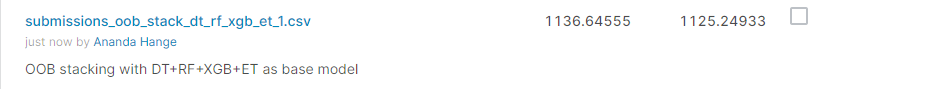

In [3]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 

print('\t\t\tComparitive model study')
myTable = PrettyTable(['Model', "Score"]) 
  
# Add rows 
myTable.add_row(["Lasso Regrssion", "1310"]) 
myTable.add_row(["Ridge Regression", "1310"]) 
myTable.add_row(["Linear Regression", "1311"]) 
myTable.add_row(["Decision Tree", "1282"]) 
myTable.add_row(["Random Forest", "1210"]) 
myTable.add_row(["Adaboost", "1439"]) 
myTable.add_row(["Xgboost", "1133"])
myTable.add_row(["Stacking with Xgboost As base model", "1148"])
myTable.add_row(["Stacking with Decision tree As base model", "1218"])
myTable.add_row(["Stacking with (dt + Xgboosst) as  base model", "1175"])
myTable.add_row(["Stacking with (dt + Xgboosst+RF) as  base model", "1186"])
myTable.add_row(["oob stacking with (dt + Xgboosst + RF) as  base model", "1137"])
myTable.add_row(["oob stacking with (dt + Xgboosst + RF + ET) as  base model", "1136"])

  
print(myTable)

			Comparitive model study
+------------------------------------------------------------+-------+
|                           Model                            | Score |
+------------------------------------------------------------+-------+
|                      Lasso Regrssion                       |  1310 |
|                      Ridge Regression                      |  1310 |
|                     Linear Regression                      |  1311 |
|                       Decision Tree                        |  1282 |
|                       Random Forest                        |  1210 |
|                          Adaboost                          |  1439 |
|                          Xgboost                           |  1133 |
|            Stacking with Xgboost As base model             |  1148 |
|         Stacking with Decision tree As base model          |  1218 |
|        Stacking with (dt + Xgboosst) as  base model        |  1175 |
|      Stacking with (dt + Xgboosst+RF) as  base m

### Summary:

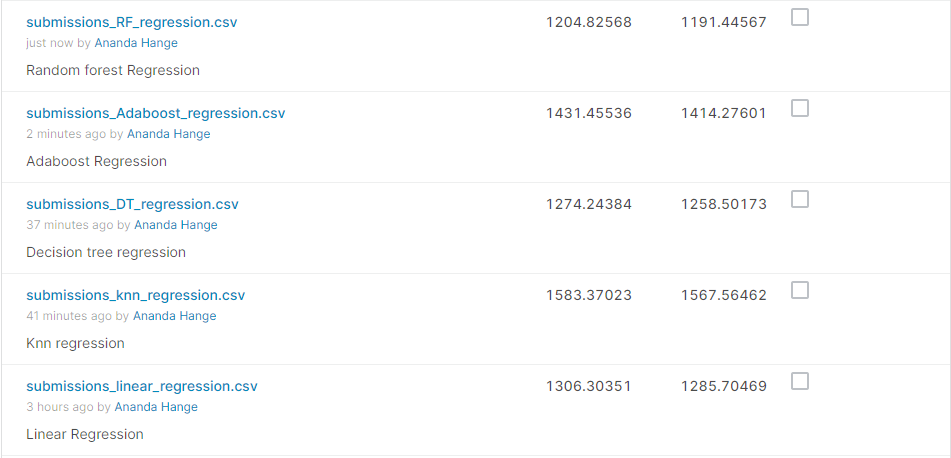

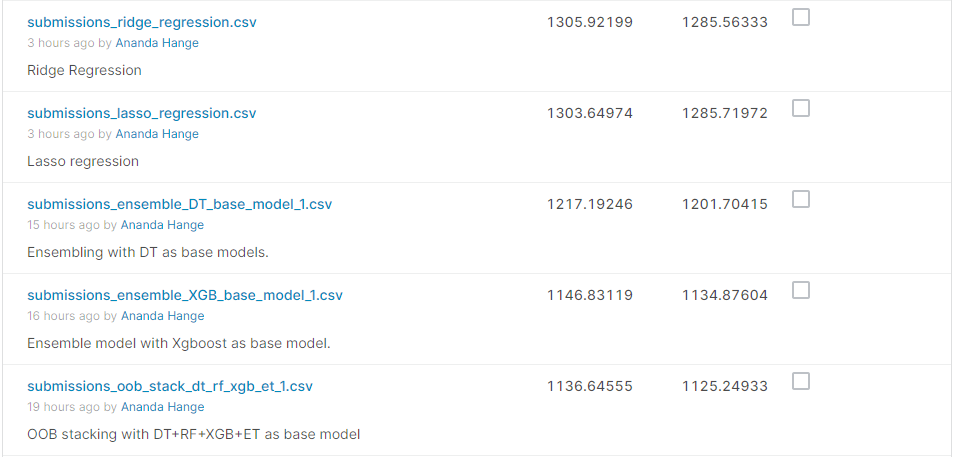

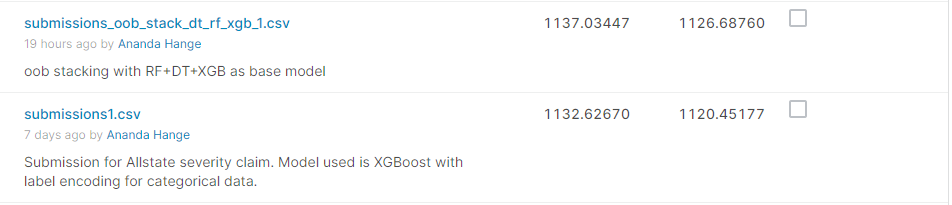

### Since Xgboost model perform well. So we will save model as well as some important variables for preprocessing and future prediction 

In [81]:
#saving best model 
import joblib

filename = '/content/finalized_model.sav'

joblib.dump(final_model, filename)

['/content/finalized_model.sav']

In [83]:
#saving important variables: 
np.save('/content/feature_level_count_train_dict.npy', feature_count_train_dict) 

np.save('/content/categorical_features_train.npy', categorical_features_train)
np.save('/content/label_encoded_map_dict.npy', label_encoded_map_dict) 